# **Prueba Data Scientist Habi**

---



## **Antes de empezar**, por favor guarde este notebook como una copia personal, para no editar la versión original de esta. Esto lo puede hacer en File->Save a copy in Drive

## librerias

### Intalacion de librerias

In [1]:
# import esda
# from libpysal.weights import KNN
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from matplotlib.colors import Normalize, ListedColormap
# from matplotlib.cm import ScalarMappable

# # Colores para cada tipo de relación
# colores_relacion = {
#     'Ns': 'grey',
#     'HH': 'red',
#     'LH': 'blue',
#     'LL': 'green',
#     'HL': 'purple'
# }

# def plot_moran_maps(dataframe, centro, xlim_offsets, ylim_offsets, columnas_periodos, varGeo, title):
#     num_rows = len(columnas_periodos) // 3 + (len(columnas_periodos) % 3 > 0)
#     num_cols = 3 if len(columnas_periodos) > 2 else len(columnas_periodos)

#     fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 15))
#     axs = axs.flatten() if num_rows > 1 else [axs]

#     for i, periodo in enumerate(columnas_periodos):
#         nodos_filtrados = dataframe.copy()
#         nodos_filtrados = nodos_filtrados.dropna(subset=[periodo])
#         # nodos_filtrados = nodos_filtrados[nodos_filtrados[periodo] != 0]
#         # # Opcional: Ajustar los valores de churn maximo
#         nodos_filtrados[periodo] = nodos_filtrados[periodo].apply(lambda x: min(x, 0.05))

#         y = nodos_filtrados[periodo].values
#         w_knn = KNN.from_dataframe(nodos_filtrados, k=10)
#         w_knn.transform = 'R'
#         moran_local = esda.Moran_Local(y, w_knn, permutations=999)

#         tipo_relacion = ['Ns'] * len(nodos_filtrados)
#         tipo_relacion = np.array(tipo_relacion)
#         significancia = moran_local.p_sim < 0.05
#         tipo_relacion[significancia & (moran_local.q == 1)] = 'HH'
#         tipo_relacion[significancia & (moran_local.q == 2)] = 'LH'
#         tipo_relacion[significancia & (moran_local.q == 3)] = 'LL'
#         tipo_relacion[significancia & (moran_local.q == 4)] = 'HL'

#         nodos_filtrados[f"tipo_relacion_{periodo}"] = tipo_relacion
#         color_map = {'Ns': 'grey', 'HH': 'red', 'LH': 'blue', 'LL': 'green', 'HL': 'purple'}
#         nodos_filtrados[f"color_{periodo}"] = nodos_filtrados[f"tipo_relacion_{periodo}"].map(color_map)

#         ax = axs[i]
#         nodos_filtrados.plot(color=nodos_filtrados[f"color_{periodo}"], ax=ax, legend=False, edgecolor='none')
#         ax.set_xlim(centro['x'] - xlim_offsets[0], centro['x'] + xlim_offsets[1])
#         ax.set_ylim(centro['y'] - ylim_offsets[0], centro['y'] + ylim_offsets[1])
#         ax.set_title(periodo[-6:])
#         ax.axis('off')

#         try:
#             ctx.add_basemap(ax, crs=nodos_filtrados.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
#         except Exception as e:
#             print(f"No se pudo cargar el mapa base: {e}")

#     # Crear y configurar la leyenda
#     cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])

#     # Crear un mapeo de colores personalizado para la leyenda
#     cmap = ListedColormap(list(colores_relacion.values()))

#     cb = plt.colorbar(ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=4)), cax=cax, ticks=[0, 1, 2, 3, 4])
#     cb.set_ticklabels(['Ns', 'HH', 'LH', 'LL', 'HL'])
#     cb.set_label('Tipo de Relación Espacial')

#     plt.tight_layout(rect=[0, 0, 0.9, 1])
#     fig.suptitle(title, fontsize=20, y=1.02)
#     plt.show()

# # Ejemplo de uso para cada región, asumiendo que los dataframes y los periodos están definidos
# regiones = [
#     (NodoHFC_varCentro, {'x': -74.09871, 'y': 4.65968}, (0.14, 0.10), (0.16, 0.16), columnas_periodos, varGeo, f"{varGeo} - Moran Región Centro"),
#     (NodoHFC_varNorcc, {'x': -75.57941, 'y': 6.24336}, (0.07, 0.07), (0.12, 0.12), columnas_periodos, varGeo, f"{varGeo} - Moran Region Noroccidente"),
#     (NodoHFC_varOcc, {'x': -76.51536, 'y': 3.42693}, (0.07, 0.07), (0.12, 0.12), columnas_periodos, varGeo, f"{varGeo} - Moran Region Occidente"),
#     (NodoHFC_varOriente, {'x': -73.11403, 'y': 7.11309}, (0.05, 0.05), (0.10, 0.10), columnas_periodos, varGeo, f"{varGeo} - Moran Region Oriente"),
#     (NodoHFC_varCosta, {'x': -74.80508, 'y': 10.96947}, (0.07, 0.07), (0.12, 0.12), columnas_periodos, varGeo, f"{varGeo} - Moran Region Region Costa"),

# ]

# for df, centro, xlim_offsets, ylim_offsets, columnas, varGeo, title in regiones:
#     plot_moran_maps(df, centro, xlim_offsets, ylim_offsets, columnas, varGeo, title)

In [2]:
import importlib
import subprocess
import sys

## Funcion para revisar si la libreria ya esta instalada, si no esta la instala.
def ensure_library_installed(library_name):
    try:
        # Intenta importar la librería
        importlib.import_module(library_name)
        print(f"La librería '{library_name}' ya está instalada.")
    except ImportError:
        print(f"La librería '{library_name}' no está instalada. Instalando ahora...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", library_name])
        print(f"Librería '{library_name}' instalada correctamente.")

# Ejemplo de uso
librerias =["geopandas","contextily","esda","libpysal","mapclassify","pysal","folium","ipyleaflet","gdown","matplotlib","pandas",
            "pyspark","seaborn","scikit-learn","virtualenv","xgboost","lightgbm"]
for i in librerias:
    ensure_library_installed(i)

La librería 'geopandas' ya está instalada.
La librería 'contextily' ya está instalada.
La librería 'esda' no está instalada. Instalando ahora...
Librería 'esda' instalada correctamente.
La librería 'libpysal' no está instalada. Instalando ahora...
Librería 'libpysal' instalada correctamente.
La librería 'mapclassify' ya está instalada.
La librería 'pysal' ya está instalada.
La librería 'folium' ya está instalada.
La librería 'ipyleaflet' ya está instalada.
La librería 'gdown' ya está instalada.
La librería 'matplotlib' ya está instalada.
La librería 'pandas' ya está instalada.
La librería 'pyspark' ya está instalada.
La librería 'seaborn' ya está instalada.
La librería 'scikit-learn' no está instalada. Instalando ahora...
Librería 'scikit-learn' instalada correctamente.
La librería 'virtualenv' ya está instalada.
La librería 'xgboost' ya está instalada.
La librería 'lightgbm' ya está instalada.


In [3]:
# pip install libpysal

In [4]:
# pip install --upgrade pip setuptools wheel

In [5]:
# pip uninstall numpy
# pip install numpy==1.25.2 --force-reinstall

In [6]:
from pyspark.sql import SparkSession
import requests
import tempfile
import time
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
import json
from shapely.geometry import shape
import scipy
import matplotlib.pyplot as plt
import contextily as ctx
import mapclassify
# from libpysal import io
# from libpysal import weights
import lightgbm as lgb

In [7]:
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [9]:
# Librerías de PySAL
# from libpysal.weights import Queen, KNN, Rook  # distintos tipos de contigüidad
# from esda.moran import Moran

In [10]:
print("Versión de pandas:", pd.__version__)
print("Versión de numpy:", np.__version__)

Versión de pandas: 2.2.3
Versión de numpy: 2.2.2


## **Punto 1**


---



Descargar base de datos de UPLs (subdivisión urbana para Bogotá) y de inmuebles, todo con código. Es decir, utilizando las librerías necesarias para extraer datos desde internet sin necesidad de leerlos de manera local. Sugerimos la librería urllib.

* UPLs: 'https://datosabiertos.bogota.gov.co/dataset/808582fc-ffc8-4649-8428-7e1fd8d3820c/resource/a5c8c591-0708-420f-8eb7-9f3147e21c40/download/unidadplaneamientolocal.json'
* Inmuebles: 'https://storage.googleapis.com/pruebas-data-analitica/inmuebles_full.csv.gz'

Esta segunda tabla tiene información de inmuebles publicados en páginas web.



### PIpeline de lectura

In [11]:
# URL del archivo JSON
url = "https://datosabiertos.bogota.gov.co/dataset/808582fc-ffc8-4649-8428-7e1fd8d3820c/resource/a5c8c591-0708-420f-8eb7-9f3147e21c40/download/unidadplaneamientolocal.json"

# Reintentos
max_retries = 5
retry_delay = 10  # Segundos

# output_path = "unidadplaneamientolocal.json"
# Ruta y nombre donde se guardará el archivo descargado
# output_ath = "C:/Users/Wilson/Documents/Prueba_Habi//Data/unidadplaneamientolocal.json"
output_path = "C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Data/unidadplaneamientolocal.json"

for attempt in range(max_retries):
    response = requests.get(url)
    if response.status_code == 200:
        with open(output_path, "wb") as f:
            f.write(response.content)
        print("Archivo descargado correctamente.")
        break
    else:
        print(f"Intento {attempt + 1} fallido. Código de estado: {response.status_code}. Reintentando en {retry_delay} segundos... por lo que no se pudo leer directamente desde la URL")
        time.sleep(retry_delay)
else:
    print("No se pudo descargar el archivo después de varios intentos.")

# Leer el archivo descargado manualmente
gdf = gpd.read_file(output_path)


os.remove(output_path) # eliminamos el archivos guradado, asi solo quedaria en memoria virtual.
# Ver las primeras filas del GeoDataFrame

Archivo descargado correctamente.


## Exploracion de la data

In [12]:
print(gdf.shape)
gdf.head()

(33, 18)


,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry
0,1,UPL13,Tintal,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,Que mediante Resolución 2050 del 23 de noviemb...,1284.993710,Sector Sur Occidente,,2022-11-23 00:00:00+00:00,553,1,0.154174,0.001046,"POLYGON ((-74.16957 4.65632, -74.16955 4.65631..."
1,2,UPL30,Salitre,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1578.491209,Sector Occidente,,2022-11-23 00:00:00+00:00,553,1,0.144109,0.001285,"POLYGON ((-74.09471 4.66478, -74.10058 4.65718..."
2,3,UPL22,Restrepo,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1075.501295,Sector Centro Ampliado,,2022-11-23 00:00:00+00:00,553,1,0.143360,0.000876,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
3,4,UPL31,Puente Aranda,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1731.114624,Sector Centro Ampliado,,2022-11-23 00:00:00+00:00,553,1,0.161116,0.001410,"POLYGON ((-74.0832 4.6247, -74.084 4.62371, -7..."
4,5,UPL32,Teusaquillo,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1419.316994,Sector Centro Ampliado,,2022-11-23 00:00:00+00:00,553,1,0.148314,0.001156,"POLYGON ((-74.0716 4.61775, -74.07283 4.61542,..."


In [13]:
print(gdf.crs)

EPSG:4686


In [14]:
gdf.dtypes

OBJECTID                                    int32
CODIGO_UPL                                 object
NOMBRE                                     object
ACTO_ADMINISTRATIVO                        object
NUMERO_ACTO_ADMINISTRATIVO                 object
FECHA_ACTO_ADMINISTRATIVO     datetime64[ms, UTC]
NORMATIVA                                  object
VOCACION                                   object
OBSERVACION                                object
AREA_HA                                   float64
SECTOR                                     object
ESCALA_CAPTURA                             object
FECHA_CAPTURA                 datetime64[ms, UTC]
RESPONSABLE                                object
RULEID                                      int32
SHAPE_Length                              float64
SHAPE_Area                                float64
geometry                                 geometry
dtype: object

In [15]:
gdf.isnull().sum().sort_values(ascending=False)

OBJECTID                      0
CODIGO_UPL                    0
NOMBRE                        0
ACTO_ADMINISTRATIVO           0
NUMERO_ACTO_ADMINISTRATIVO    0
FECHA_ACTO_ADMINISTRATIVO     0
NORMATIVA                     0
VOCACION                      0
OBSERVACION                   0
AREA_HA                       0
SECTOR                        0
ESCALA_CAPTURA                0
FECHA_CAPTURA                 0
RESPONSABLE                   0
RULEID                        0
SHAPE_Length                  0
SHAPE_Area                    0
geometry                      0
dtype: int64

In [16]:
## Se hace necesario convertir epsg=4686 a epsg=4326  cuando se trabaja condatos geoespaciales y se requiere estandarizar el sistema de cooredenadas
if gdf.crs is None or gdf.crs.to_epsg() != 4686:
    gdf.set_crs(epsg=4686, inplace=True)

# Convertir el CRS a EPSG:4326
gdf = gdf.to_crs(epsg=4326)

In [17]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
## Leemos el otro archivo
# URL del archivo comprimido
url = 'https://storage.googleapis.com/pruebas-data-analitica/inmuebles_full.csv.gz'
# Leer el archivo comprimido directamente desde la URL el archivo comprimido
try:
    inmuebles = pd.read_csv(url, compression='gzip')
    # Mostrar las primeras filas del DataFrame
    # print(inmuebles.head())
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
inmuebles.head()

,id,fecha_creacion,latitud,longitud,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,direccion,anos_antiguedad,tipo_inmueble,tiponegocio
0,3669162,2022-03-02,3.36400,-76.495003,VALLE DEL CAUCA,CALI,3.0,2,81.0,2.640000e+08,0,1,Carrera 99A # 45 - 200 Apto 706 Torre 3 Lili d...,12,apartamento,venta
1,3067524,2021-12-12,6.14300,-75.601997,ANTIOQUIA,SABANETA,2.0,3,90.0,4.600000e+08,1,2,Calle 70A SUR # 35 - 340 Apto 3402 Urbanizacio...,4,apartamento,venta
2,3944108,2022-03-18,4.89866,-74.043427,CUNDINAMARCA,CAJICÁ,3.0,4,140.0,1.000000e+09,0,4,abaco,4,casa,venta
3,500215,2020-07-23,6.12084,-75.425949,ANTIOQUIA,RIONEGRO,3.0,2,75.0,1.600000e+06,0,1,CALLE 32 52B- 150,1,apartamento,arriendo
4,741346,2020-09-15,4.93952,-73.982620,CUNDINAMARCA,SOPÓ,4.0,5,750.0,3.300000e+09,0,6,AUTOPISTA NORTE KM 33,12,casa,venta


In [19]:
print(inmuebles.shape)

(882888, 16)


In [20]:
## Es necesario converitr inmuebles a gdf para poder hacer el jion espacial y que quede EPSG:4326 de cordanadas latitud y longitud

# Verificar que las columnas 'latitud' y 'longitud' existen en el DataFrame
if 'latitud' in inmuebles.columns and 'longitud' in inmuebles.columns:
    # Crear una columna de geometría usando las coordenadas
    geometry = [Point(xy) for xy in zip(inmuebles['longitud'], inmuebles['latitud'])]
    
    # Convertir a GeoDataFrame
    ginmuebles = gpd.GeoDataFrame(inmuebles, geometry=geometry)
    
    # Asignar el sistema de coordenadas EPSG:4326
    ginmuebles.set_crs(epsg=4326, inplace=True)
    
    # Mostrar las primeras filas del GeoDataFrame
    # print(ginmuebles.head())
else:
    print("El DataFrame no contiene las columnas 'latitud' y 'longitud'.")

In [21]:
## precio_m2 calculamos la columna precio_m2 dado que la necesitaremos luego para solucion de otro punto
ginmuebles['precio_m2']=ginmuebles['precio']/ginmuebles['area']

In [22]:
ginmuebles.dtypes

id                    int64
fecha_creacion       object
latitud             float64
longitud            float64
departamento         object
municipio            object
habitaciones        float64
banos                 int64
area                float64
precio              float64
num_ascensores        int64
garajes               int64
direccion            object
anos_antiguedad       int64
tipo_inmueble        object
tiponegocio          object
geometry           geometry
precio_m2           float64
dtype: object

In [23]:
ginmuebles['fecha_creacion'] = pd.to_datetime(ginmuebles['fecha_creacion'], format='%Y-%m-%d')

In [24]:
# Formatear la columna 'precio' para evitar notación científica
ginmuebles['precio'] = ginmuebles['precio'].apply(lambda x: '{:.0f}'.format(x))
ginmuebles['precio'] = ginmuebles['precio'].round(2)
ginmuebles['precio_m2'] = ginmuebles['precio_m2'].round(2)

In [25]:
ginmuebles.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
ginmuebles.isnull().sum().sort_values(ascending=False)

precio_m2          22205
habitaciones         741
direccion            224
id                     0
fecha_creacion         0
latitud                0
municipio              0
banos                  0
departamento           0
longitud               0
precio                 0
area                   0
garajes                0
num_ascensores         0
anos_antiguedad        0
tipo_inmueble          0
tiponegocio            0
geometry               0
dtype: int64

## **Punto 2**

---



Hacer un join espacial entre la base de datos de UPLs e inmuebles y
calcular cuántas ofertas inmobiliarias existen en Bogotá por UPL. Para esto sugerimos usar la librería de GeoPandas.

In [27]:
# Número total de geometrías
print("Total de geometrías en gdf:", len(gdf))

# Geometrías nulas
print("Geometrías nulas en gdf:", gdf['geometry'].isna().sum())

# Geometrías vacías
print("Geometrías vacías en gdf:", gdf['geometry'].is_empty.sum())

# Geometrías válidas
print("Geometrías inválidas en gdf:", (~gdf.is_valid).sum())

Total de geometrías en gdf: 33
Geometrías nulas en gdf: 0
Geometrías vacías en gdf: 0
Geometrías inválidas en gdf: 0


In [28]:
# Número total de geometrías
print("Total de geometrías en ginmuebles:", len(ginmuebles))

# Geometrías nulas
print("Geometrías nulas en ginmuebles:", ginmuebles['geometry'].isna().sum())

# Geometrías vacías
print("Geometrías vacías en ginmuebles:", ginmuebles['geometry'].is_empty.sum())

# Geometrías válidas
print("Geometrías inválidas en ginmuebles:", (~ginmuebles.is_valid).sum())

Total de geometrías en ginmuebles: 882888
Geometrías nulas en ginmuebles: 0
Geometrías vacías en ginmuebles: 0
Geometrías inválidas en ginmuebles: 0


In [29]:
## verificar que las geometrias de ambos dataset sean validas
print(ginmuebles.is_valid.all())
print(gdf.is_valid.all())

True
True


In [30]:
print(ginmuebles.crs)
print(gdf.crs)

EPSG:4326
EPSG:4326


<Axes: >

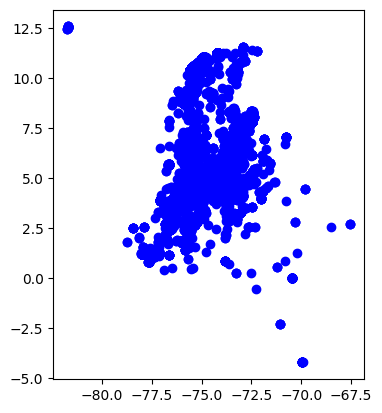

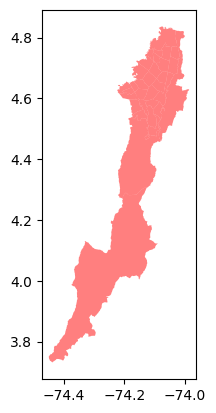

In [31]:
# Visualizar Geometrías: Si no hay intersecciones aparentes, visualiza las capas:
ginmuebles.plot(color='blue')
gdf.plot(color='red', alpha=0.5)

C:\Users\lucas\AppData\Local\Temp\ipykernel_1172\1787735980.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


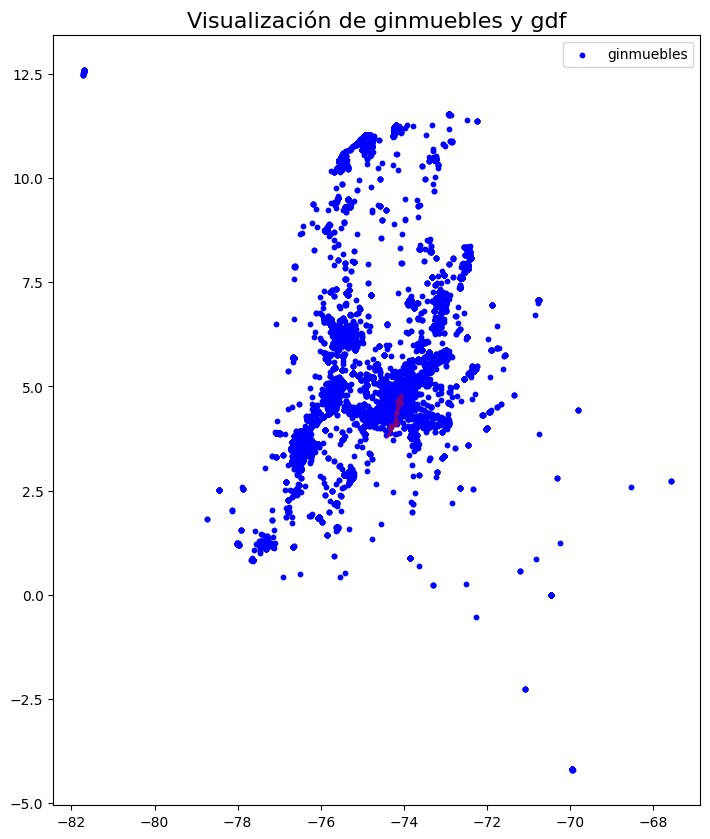

In [32]:
import matplotlib.pyplot as plt

# Crear un nuevo mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear ginmuebles en azul
ginmuebles.plot(ax=ax, color='blue', markersize=10, label='ginmuebles')

# Plotear gdf en rojo con transparencia
gdf.plot(ax=ax, color='red', alpha=0.5, label='gdf')

# Configurar leyenda y título
ax.legend()
ax.set_title("Visualización de ginmuebles y gdf", fontsize=16)
plt.show()

In [33]:
from shapely.geometry import box

# Verificar intersecciones entre geometrías
ginmuebles_bounds = ginmuebles.total_bounds  # Límites de ginmuebles
gdf_bounds = gdf.total_bounds  # Límites de gdf

# Crear un polígono de prueba con los límites
ginmuebles_box = box(*ginmuebles_bounds)
gdf_box = box(*gdf_bounds)

print(ginmuebles_box.intersects(gdf_box))  # Debería devolver True si hay intersección

True


In [34]:
print("Límites de ginmuebles:", ginmuebles.total_bounds)
print("Límites de gdf:", gdf.total_bounds)

Límites de ginmuebles: [-81.73149872  -4.21575212 -67.56575012  12.59300041]
Límites de gdf: [-74.44977953   3.73103034 -73.98653428   4.83677909]


In [35]:
# # Reparar Geometrías Inválidas:
# ginmuebles['geometry'] = ginmuebles['geometry'].buffer(0)
# # gdf['geometry'] = gdf['geometry'].buffer(0)
# print(ginmuebles.crs)
# print(gdf.crs)

In [36]:
# if ginmuebles.crs != gdf.crs:
# ginmuebles = ginmuebles.to_crs(gdf.crs)
## Hacemos el spatial join
ginmuebles_c = gpd.sjoin(ginmuebles, gdf[['CODIGO_UPL', 'NOMBRE', 'geometry']], how='left', predicate='intersects')
ginmuebles_c['precio'] = ginmuebles_c['precio'].astype(float)
ginmuebles_c.head()

,id,fecha_creacion,latitud,longitud,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,direccion,anos_antiguedad,tipo_inmueble,tiponegocio,geometry,precio_m2,index_right,CODIGO_UPL,NOMBRE
0,3669162,2022-03-02,3.36400,-76.495003,VALLE DEL CAUCA,CALI,3.0,2,81.0,2.640000e+08,0,1,Carrera 99A # 45 - 200 Apto 706 Torre 3 Lili d...,12,apartamento,venta,POINT (-76.495 3.364),3259259.26,NaN,NaN,NaN
1,3067524,2021-12-12,6.14300,-75.601997,ANTIOQUIA,SABANETA,2.0,3,90.0,4.600000e+08,1,2,Calle 70A SUR # 35 - 340 Apto 3402 Urbanizacio...,4,apartamento,venta,POINT (-75.602 6.143),5111111.11,NaN,NaN,NaN
2,3944108,2022-03-18,4.89866,-74.043427,CUNDINAMARCA,CAJICÁ,3.0,4,140.0,1.000000e+09,0,4,abaco,4,casa,venta,POINT (-74.04343 4.89866),7142857.14,NaN,NaN,NaN
3,500215,2020-07-23,6.12084,-75.425949,ANTIOQUIA,RIONEGRO,3.0,2,75.0,1.600000e+06,0,1,CALLE 32 52B- 150,1,apartamento,arriendo,POINT (-75.42595 6.12084),21333.33,NaN,NaN,NaN
4,741346,2020-09-15,4.93952,-73.982620,CUNDINAMARCA,SOPÓ,4.0,5,750.0,3.300000e+09,0,6,AUTOPISTA NORTE KM 33,12,casa,venta,POINT (-73.98262 4.93952),4400000.00,NaN,NaN,NaN


In [37]:
print(ginmuebles_c.shape)
ginmuebles_c.isnull().sum().sort_values(ascending=False)

(882888, 21)


NOMBRE             518110
index_right        518110
CODIGO_UPL         518110
precio              22205
precio_m2           22205
habitaciones          741
direccion             224
departamento            0
fecha_creacion          0
id                      0
longitud                0
latitud                 0
municipio               0
garajes                 0
num_ascensores          0
banos                   0
area                    0
geometry                0
tiponegocio             0
tipo_inmueble           0
anos_antiguedad         0
dtype: int64

In [38]:
ginmuebles_c['municipio'].value_counts()

municipio
BOGOTÁ, D.C.      364800
MEDELLÍN           99882
CALI               70233
BARRANQUILLA       39372
ENVIGADO           30846
                   ...  
EL PIÑÓN               1
CIUDAD BOLÍVAR         1
ÍQUIRA                 1
PUERTO WILCHES         1
AMBALEMA               1
Name: count, Length: 636, dtype: int64

In [39]:
# Convertir todas las filas de la columna `municipio` a mayúsculas
ginmuebles_c['municipio'] = ginmuebles_c['municipio'].str.upper()

# Filtrar las filas que contienen "BOGOT"
contains_bogot = ginmuebles_c[ginmuebles_c['municipio'].str.contains("BOGOT", na=False)]

# Contar los registros
count_bogot = contains_bogot.shape[0]

print(f"Cantidad de registros que contienen 'BOGOT': {count_bogot}")

Cantidad de registros que contienen 'BOGOT': 364800


In [40]:
bogota=ginmuebles_c[ginmuebles_c['municipio'].str.contains("BOGOT", na=False)]
bogota.head(2)

,id,fecha_creacion,latitud,longitud,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,direccion,anos_antiguedad,tipo_inmueble,tiponegocio,geometry,precio_m2,index_right,CODIGO_UPL,NOMBRE
27,2596584,2021-10-22,4.687000,-74.019997,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3.0,5,278.0,18000000.0,1,4,KR 5 ESTE 109 A 18,23,apartamento,arriendo,POINT (-74.02 4.687),64748.20,31.0,UPL06,Cerros Orientales
32,3002864,2021-12-09,4.774504,-74.025375,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3.0,2,78.0,285000000.0,0,1,Carrera 11 A N. 191-28,4,apartamento,venta,POINT (-74.02538 4.7745),3653846.15,31.0,UPL06,Cerros Orientales


In [41]:
bogota.isnull().sum().sort_values(ascending=False)

precio             9856
precio_m2          9856
habitaciones        319
direccion            38
CODIGO_UPL           33
NOMBRE               33
index_right          33
departamento          0
fecha_creacion        0
id                    0
longitud              0
latitud               0
municipio             0
garajes               0
num_ascensores        0
banos                 0
area                  0
geometry              0
tiponegocio           0
tipo_inmueble         0
anos_antiguedad       0
dtype: int64

### Conteo de UPLs para la cuidad de Bogota

In [42]:
conteo_codigos = bogota.groupby('CODIGO_UPL')['CODIGO_UPL'].count()
# Convertir a DataFrame y renombrar las columnas
conteo_codigos = conteo_codigos.reset_index(name='Cantidad Oferta')
# Ordenar el DataFrame por 'Cantidad Oferta' en orden ascendente
conteo_codigos = conteo_codigos.sort_values(by='Cantidad Oferta', ascending=False)
conteo_codigos

,CODIGO_UPL,Cantidad Oferta
24,UPL25,104775
23,UPL24,61630
26,UPL27,34948
7,UPL08,27014
31,UPL32,17935
29,UPL30,15419
25,UPL26,14609
32,UPL33,11034
22,UPL23,10543
12,UPL13,9093


In [43]:
print(bogota.groupby('CODIGO_UPL').count().shape)

(33, 20)


## **Punto 3**


---



Use una visualización que permita ver cuántas ofertas de inmuebles existen por UPL.

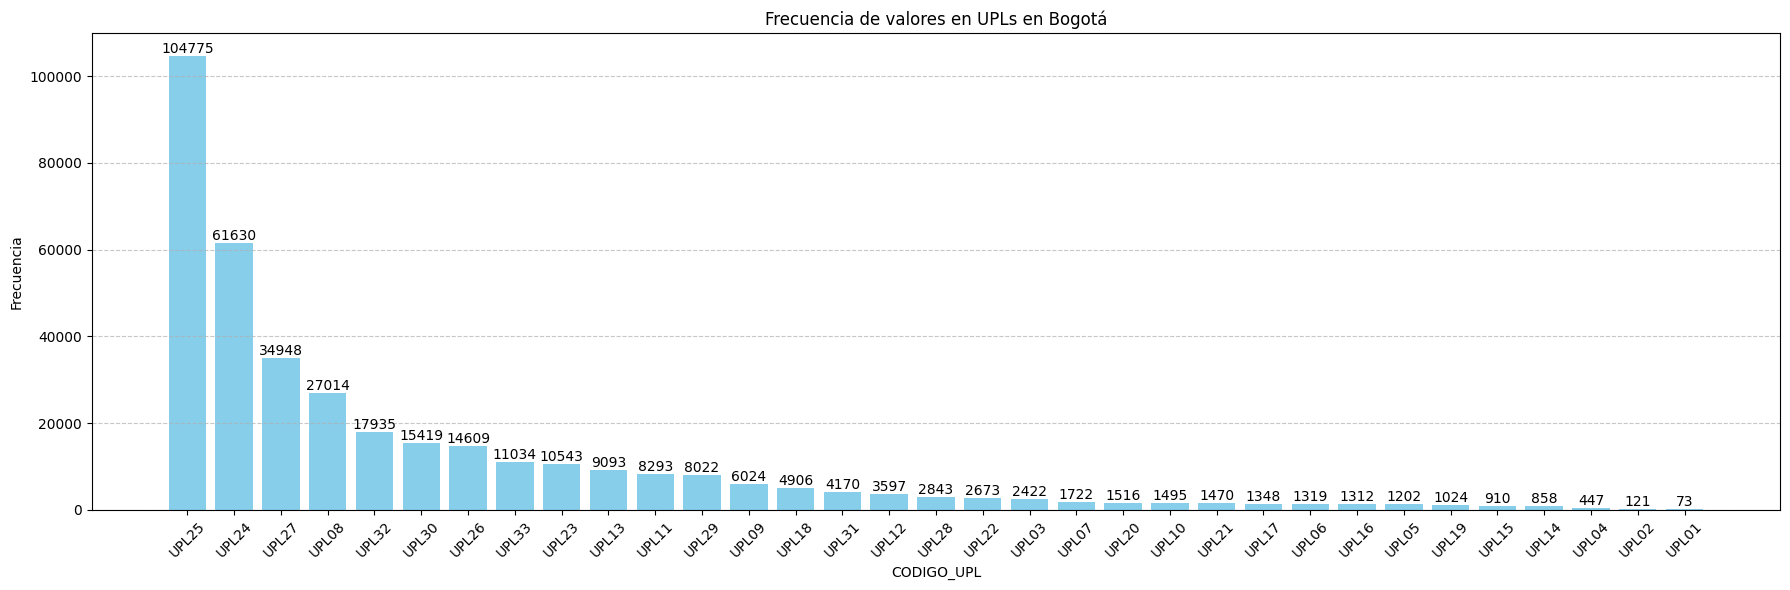

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama `bogota`
# Contar los valores de la columna 'CODIGO_UPL'
upl_counts = bogota['CODIGO_UPL'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(18, 6))
bars = plt.bar(upl_counts.index, upl_counts.values, color='skyblue')

# Configurar etiquetas y título
plt.title('Frecuencia de valores en UPLs en Bogotá')
plt.xlabel('CODIGO_UPL')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas en eje X para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los conteos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
output_path = "C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/Frecuencia_upls_bogota.jpg"
plt.savefig(output_path, format='png', dpi=300)
plt.show()

In [45]:
bogota_upl_conteo = pd.merge(gdf ,conteo_codigos,  on='CODIGO_UPL', how='left')
print(bogota_upl_conteo.shape)
bogota_upl_conteo.head(2)

(33, 19)


,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry,Cantidad Oferta
0,1,UPL13,Tintal,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,Que mediante Resolución 2050 del 23 de noviemb...,1284.993710,Sector Sur Occidente,,2022-11-23 00:00:00+00:00,553,1,0.154174,0.001046,"POLYGON ((-74.16957 4.65632, -74.16955 4.65631...",9093
1,2,UPL30,Salitre,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1578.491209,Sector Occidente,,2022-11-23 00:00:00+00:00,553,1,0.144109,0.001285,"POLYGON ((-74.09471 4.66478, -74.10058 4.65718...",15419


Min: 73, Max: 104775


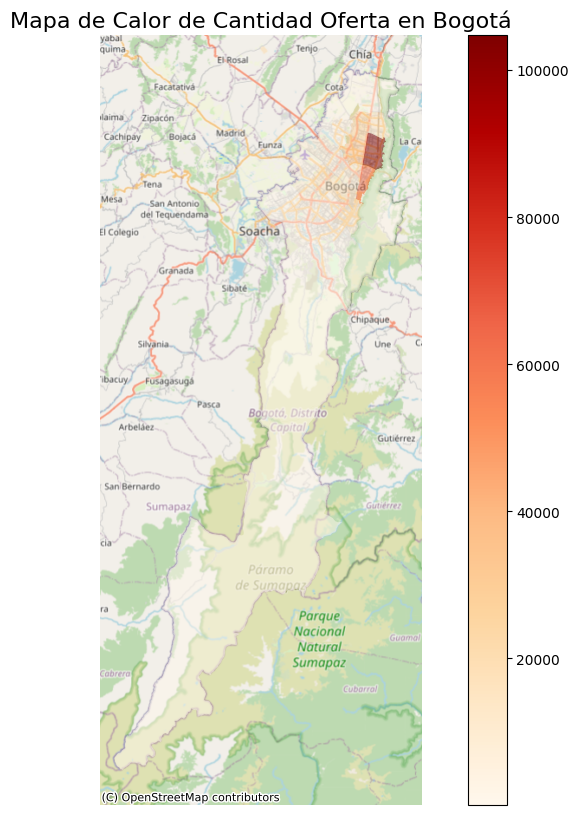

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Suponiendo que el GeoDataFrame se llama 'bogota_upl_conteo'

# Verificar el mínimo y máximo de 'Cantidad Oferta'
min_val = bogota_upl_conteo['Cantidad Oferta'].min()
max_val = bogota_upl_conteo['Cantidad Oferta'].max()
print(f"Min: {min_val}, Max: {max_val}")

# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 10))

# Plotear los polígonos con transparencia basada en 'Cantidad Oferta'
bogota_upl_conteo.plot(
    column='Cantidad Oferta',  # Columna para el mapa de calor
    cmap='OrRd',              # Colormap para representar los valores
    legend=True,              # Mostrar leyenda
    alpha=0.5,                # Transparencia del 50%
    ax=ax                     # Ejes para graficar
)

# Agregar un fondo de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=bogota_upl_conteo.crs)

# Configurar el título y etiquetas
ax.set_title("Mapa de Calor de Cantidad Oferta en Bogotá", fontsize=16)
ax.set_axis_off()  # Quitar ejes

# Mostrar el mapa
plt.show()

Min: 73, Max: 104775


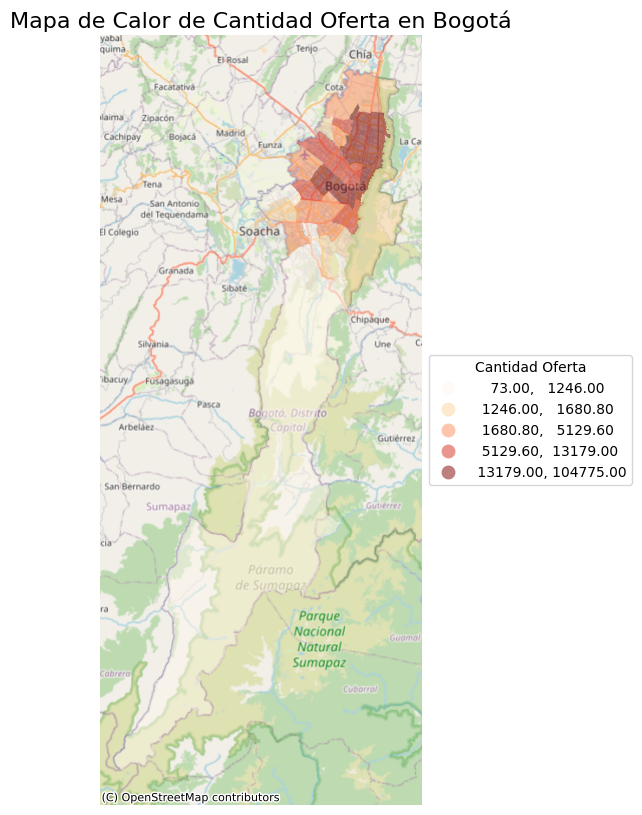

In [49]:
# Suponiendo que el GeoDataFrame se llama 'bogota_upl_conteo'

# Verificar el mínimo y máximo de 'Cantidad Oferta'
min_val = bogota_upl_conteo['Cantidad Oferta'].min()
max_val = bogota_upl_conteo['Cantidad Oferta'].max()
print(f"Min: {min_val}, Max: {max_val}")

# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 10))

# Plotear los polígonos con clasificación de bins basada en cuartiles (quantiles)
bogota_upl_conteo.plot(
        column='Cantidad Oferta',  # Columna para el mapa de calor
        cmap='OrRd',              # Colormap para representar los valores
        legend=True,              # Mostrar leyenda
        scheme='Quantiles',       # Clasificación por cuartiles
        k=5,                      # Dividir en 5 clases
        alpha=0.5,                # Transparencia del 50%
        ax=ax,                    # Ejes para graficar
        legend_kwds={
            'loc': 'center left',  # Posicionar la leyenda a la izquierda del área
            'bbox_to_anchor': (1, 0.5),  # Fuera del mapa, al lado derecho
            'title': 'Cantidad Oferta'  # Título de la leyenda
        }
    )

    # Agregar un fondo de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=bogota_upl_conteo.crs)

    # Configurar el título y etiquetas
ax.set_title("Mapa de Calor de Cantidad Oferta en Bogotá", fontsize=16)
ax.set_axis_off()  # Quitar ejes
output_path = "C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/Mapa_calor_oferte_bogota.jpg"
plt.savefig(output_path, format='png', dpi=300)
    # Mostrar el mapa
plt.show()

# **Punto 4**

Hacer una i de Moran para saber las UPLs HH, HL, LH y LL según el modelo para el valor por m2 de los inmuebles por UPL.

In [50]:
bogota.head(2)
print(bogota.shape)

(364800, 21)


In [51]:
bogota.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
# # Definir la ruta de salida
# ruta_salida = r"C:/Users/Wilson/Documents/Prueba_Habi/habi/promedio_preciom3.gpkg"
# # Crear el directorio si no existe
# os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

# # Exportar el DataFrame a GeoPackage
# bogota[['id','CODIGO_UPL','departamento','municipio','geometry','precio_m2']].to_file(ruta_salida, driver="GPKG")

# print(f"Archivo exportado exitosamente a: {ruta_salida}")

In [53]:
promedio_preciom2=bogota.groupby('CODIGO_UPL')['precio_m2'].mean()
# Convertir a DataFrame y renombrar las columnas
promedio_preciom2 = promedio_preciom2.reset_index(name='mean_precios_m2')
promedio_preciom2

,CODIGO_UPL,mean_precios_m2
0,UPL01,3.373126e+06
1,UPL02,3.943815e+06
2,UPL03,3.102156e+06
3,UPL04,2.730053e+06
4,UPL05,3.505121e+06
5,UPL06,4.259899e+06
6,UPL07,3.788795e+06
7,UPL08,3.661256e+06
8,UPL09,3.108201e+06
9,UPL10,2.958805e+06


In [54]:
promedio_preciom2 = pd.merge(gdf ,promedio_preciom2,  on='CODIGO_UPL', how='left')
print(promedio_preciom2.shape)
promedio_preciom2.head(2)

(33, 19)


,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry,mean_precios_m2
0,1,UPL13,Tintal,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,Que mediante Resolución 2050 del 23 de noviemb...,1284.993710,Sector Sur Occidente,,2022-11-23 00:00:00+00:00,553,1,0.154174,0.001046,"POLYGON ((-74.16957 4.65632, -74.16955 4.65631...",3.092299e+06
1,2,UPL30,Salitre,DEC,555,2021-12-29 00:00:00+00:00,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1578.491209,Sector Occidente,,2022-11-23 00:00:00+00:00,553,1,0.144109,0.001285,"POLYGON ((-74.09471 4.66478, -74.10058 4.65718...",5.955529e+07


In [55]:
# # Definir la ruta de salida
# ruta_salida = r"C:/Users/Wilson/Documents/Prueba_Habi/habi/promedio_preciom2.gpkg"
# # Crear el directorio si no existe
# os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

# # Exportar el DataFrame a GeoPackage
# promedio_preciom2.to_file(ruta_salida, driver="GPKG")

# print(f"Archivo exportado exitosamente a: {ruta_salida}")

In [56]:
promedio_preciom2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

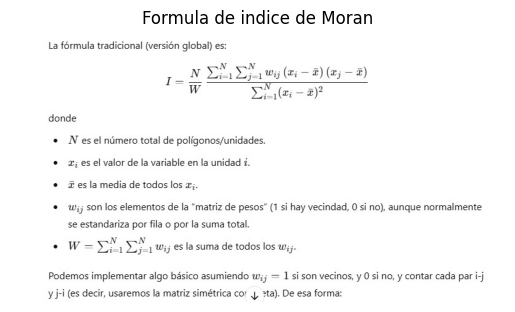

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta de la imagen
# ruta_imagen = "C:/Users/Wilson/Documents/Prueba_Habi/imagenes/I_moran.jpg"
ruta_imagen = "C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/I_moran.jpg"

# Cargar y mostrar la imagen
img = mpimg.imread(ruta_imagen)
plt.title("Formula de indice de Moran")
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()

#### Dado la formula de indice de moran necesitamos calcular la vecindad Queen. la cual considera que dos polígonos son vecinos si comparten al menos un punto en su frontera (vértices o aristas). En Shapely (la librería detrás de GeoPandas), podemos detectar esto con geom_i.touches(geom_j) (lo cual significa que las geometrías se tocan en el límite pero no se traslapan en su interior).

#### Teniendo la vecindad Queen construirimos de acuerdo a la formula de moran el indice de moran 

## Indice de moran con data pequeña para ver si funciona correctamente

### Leemos el archivo de prueba

In [58]:
# Ruta del archivo .gpkg
# ruta_archivo = r"C:/Users/Wilson/Documents/Prueba_Habi/habi/cortado2.gpkg"
ruta_archivo = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/habi/cortado2.gpkg"

# Cargar el archivo GeoPackage en un GeoDataFrame
cortado2 = gpd.read_file(ruta_archivo)

print(f"CRS actual: {cortado2.crs}")

# Convertir el CRS a EPSG:3116
cortado2 = cortado2.to_crs(epsg=3116)

# Verificar el nuevo CRS
print(f"Nuevo CRS: {cortado2.crs}")
print(cortado2.shape)
cortado2 = cortado2.dropna(subset=['precio_m2'])
cortado2.isnull().sum().sort_values(ascending=False)

CRS actual: EPSG:4326
Nuevo CRS: EPSG:3116
(2241, 5)


id              0
departamento    0
municipio       0
precio_m2       0
geometry        0
dtype: int64

In [59]:
cortado2.head()

,id,departamento,municipio,precio_m2,geometry
0,124752,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.000000e+04,POINT (1004453.169 1014522.766)
1,767586,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.133333e+04,POINT (1004463.327 1014510.744)
2,737927,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.037037e+04,POINT (1004432.854 1014529.198)
3,4309112,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",5.555556e+06,POINT (1004359.212 1014571.219)
4,3278376,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",4.200000e+06,POINT (1004377.835 1014560.358)


In [60]:
# import geopandas as gpd

# def build_queen_adjacency(gdf):
#     """
#     Crea un diccionario {i: [lista de índices j vecinos]} 
#     usando la contigüidad de Reina (queen). 
#     Para datasets medianos o pequeños (tiene complejidad O(n^2)).
#     """
#     adjacency = {}
#     # Obtenemos la lista de geometrías
#     geoms = gdf.geometry.values
    
#     for i, geom_i in enumerate(geoms):
#         neighbors_i = []
#         for j, geom_j in enumerate(geoms):
#             if i != j:
#                 # Queen adjacency => se tocan en al menos un vértice/borde
#                 if geom_i.touches(geom_j):
#                     neighbors_i.append(j)
#         adjacency[i] = neighbors_i
    
#     return adjacency

In [61]:
import geopandas as gpd
from shapely.geometry import Point

def build_distance_adjacency(gdf, threshold=100):

    adjacency = {}
    
    # Asegurar que el CRS sea proyectado para trabajar en metros
    if gdf.crs.is_geographic:
        raise ValueError("El GeoDataFrame debe estar en un CRS proyectado (e.g., EPSG:3116).")
    
    # Iterar sobre las geometrías
    for i, geom_i in enumerate(gdf.geometry):
        neighbors_i = []
        for j, geom_j in enumerate(gdf.geometry):
            if i != j:
                # Calcular la distancia entre geometrías
                if geom_i.distance(geom_j) <= threshold:
                    neighbors_i.append(j)
        adjacency[i] = neighbors_i
    
    return adjacency

In [62]:
import numpy as np

def moran_i_manual(gdf, column, adjacency):
    """
    Calcula el Moran's I básico, sin estandarización de pesos.
    adjacency es un diccionario {i: [neighbors of i]}.
    Retorna un valor escalar de Moran's I.
    """
    x = gdf[column].values
    N = len(x)
    x_mean = x.mean()
    
    # S0: sum of (x_i - x_mean)^2
    S0 = np.sum((x - x_mean)**2)
    
    # Numerador: sum_{i,j} w_{ij} * (x_i - x_mean)*(x_j - x_mean)
    num = 0
    # W = total de w_{ij}, en este caso con w_{ij}=1 si j es vecino de i
    W = 0
    
    for i, neighbors_i in adjacency.items():
        for j in neighbors_i:
            num += (x[i] - x_mean) * (x[j] - x_mean)
            W += 1  # w_{ij} = 1
    
    # Evitar división por cero (si W es 0, no se puede calcular Moran's I)
    if W == 0:
        raise ValueError("La matriz de adyacencia no tiene vecinos o está vacía, no se puede calcular Moran's I.")
    
    # La fórmula: I = (N / W) * (num / S0)
    I = (N / W) * (num / S0)
    return I

In [63]:
# 1. Construir la vecindad (queen)
# adj_dict = build_queen_adjacency(cortado2)
adj_dict = build_distance_adjacency(cortado2, threshold=100)

# 2. Calcular Moran's I
I_val = moran_i_manual(cortado2, "precio_m2", adj_dict)

print("Moran's I manual:", I_val)

Moran's I manual: 0.023435322743948717


In [64]:
import random

def moran_i_significance(gdf, column, adjacency, permutations=999):
    x = gdf[column].values
    I_obs = moran_i_manual(gdf, column, adjacency)
    
    count_extreme = 0
    # Guardamos valores para estadística descriptiva (opcional)
    perm_values = []
    
    for _ in range(permutations):
        # Barajar una copia de x
        x_perm = x.copy()
        np.random.shuffle(x_perm)  # baraja in-place
        # Ponemos estos valores barajados en una copia del gdf
        gdf_perm = gdf.copy()
        gdf_perm[column] = x_perm
        I_perm = moran_i_manual(gdf_perm, column, adjacency)
        perm_values.append(I_perm)
        
        # Contar cuántos I_perm son tan "extremos" como I_obs
        # (Hay varias formas de definir "extremo": bilateral o unilateral)
        if abs(I_perm) >= abs(I_obs):
            count_extreme += 1
    
    # p-value (aprox) bilateral
    p_val = (count_extreme + 1) / (permutations + 1)
    
    return I_obs, p_val, perm_values

In [65]:
# Ejemplo de uso:
I_obs, p_val, perm_values = moran_i_significance(cortado2, "precio_m2", adj_dict, permutations=999)

print("Moran's I observado:", I_obs)
print("p-value aproximado:", p_val)

Moran's I observado: 0.023435322743948717
p-value aproximado: 0.001


In [66]:
def classify_local_clusters(gdf, column, adjacency):
    """
    Retorna una lista con categorías 'HH', 'LL', 'HL', 'LH'
    según la media de la variable y la media de los vecinos.
    """
    x = gdf[column].values
    x_mean = x.mean()
    
    clusters = []
    for i, xi in enumerate(x):
        neighbors_i = adjacency[i]
        
        # Desviación de x_i
        diff_i = xi - x_mean
        
        if len(neighbors_i) == 0:
            # Sin vecinos: podríamos asignar "NA" o similar
            clusters.append("NoNeighbors")
            continue
        
        # Calcular la media de los vecinos
        x_neighbors = x[neighbors_i]
        mean_neighbors = x_neighbors.mean()
        
        # Comparar la media vecinal con la media global
        diff_neigh = mean_neighbors - x_mean
        
        # Clasificación:
        if diff_i > 0 and diff_neigh > 0:
            clusters.append("HH")
        elif diff_i < 0 and diff_neigh < 0:
            clusters.append("LL")
        elif diff_i > 0 and diff_neigh < 0:
            clusters.append("HL")
        elif diff_i < 0 and diff_neigh > 0:
            clusters.append("LH")
        else:
            # Si coincide el caso exacto diff_i == 0 o diff_neigh == 0,
            # podrías manejarlo aparte (rare), lo ponemos como "Boundary"
            clusters.append("Boundary")
    
    return clusters

In [67]:
clusters = classify_local_clusters(cortado2, "precio_m2", adj_dict)
cortado2["cluster"] = clusters

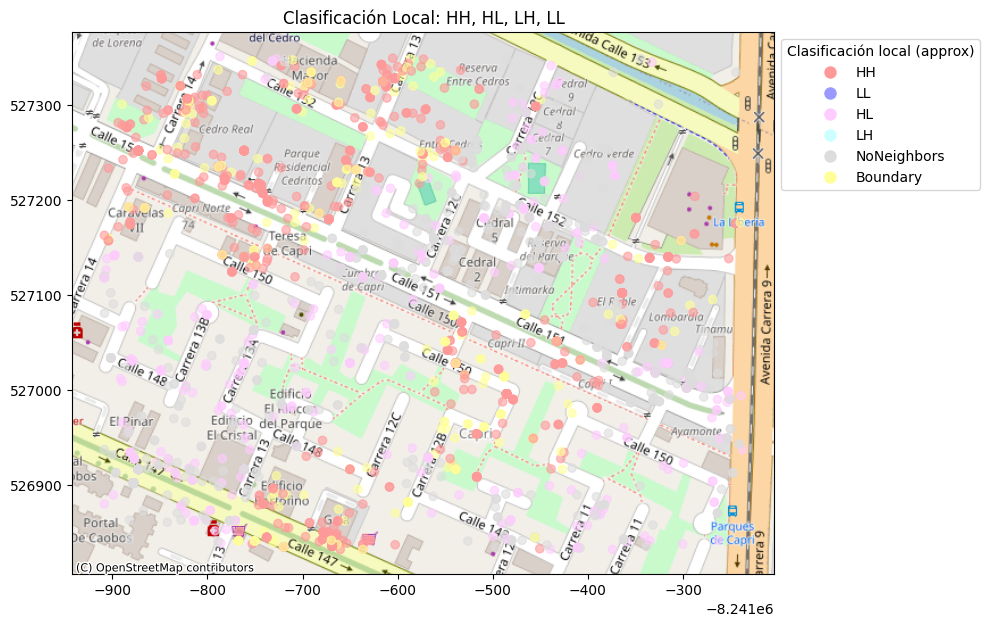

In [68]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.lines import Line2D
import contextily as ctx

# Definimos un mapeo de colores claros
color_dict = {
    "HH": "#FF9999",  # Rojo claro
    "LL": "#9999FF",  # Azul claro
    "HL": "#FFCCFF",  # Rosa pastel
    "LH": "#CCFFFF",  # Azul celeste
    "NoNeighbors": "#DDDDDD",  # Gris claro
    "Boundary": "#FFFF99"  # Amarillo pastel
}

# Lista de categorías principales
categories = ["HH", "LL", "HL", "LH", "NoNeighbors", "Boundary"]

# Creamos un ListedColormap con colores claros
cmap = clr.ListedColormap([color_dict[c] for c in categories])

# Convertimos la columna 'cluster' a valores numéricos 0..(n-1)
cat_to_num = {cat: i for i, cat in enumerate(categories)}
cortado2["cluster_code"] = cortado2["cluster"].map(cat_to_num)

# Reproyectar a EPSG:3857 para que coincida con el mapa base
cortado2 = cortado2.to_crs(epsg=3857)

# Hacemos el plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cortado2.plot(
    column="cluster_code",
    categorical=True,
    cmap=cmap,
    legend=False,
    alpha=0.6,  # Ajusta la transparencia para mostrar el mapa base
    ax=ax
)

# Agregar un fondo de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=cortado2.crs)

# Crear leyenda manual con colores claros
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cat, 
           markerfacecolor=color_dict[cat], markersize=10)
    for cat in categories
]
ax.legend(
    handles=legend_elements,
    loc='upper left',  # Posición relativa
    bbox_to_anchor=(1, 1),  # Mueve la leyenda a la derecha del gráfico
    title="Clasificación local (approx)"
)
ax.set_title("Clasificación Local: HH, HL, LH, LL")
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
# output_path = "C:/Users/Wilson/Documents/Prueba_Habi/imagenes/imagen_prueba_cortada.jpg"
output_path = "C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/imagen_prueba_cortada.jpg"
plt.savefig(output_path, format='png', dpi=300)
plt.show()

In [69]:
import os
os.makedirs("C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/", exist_ok=True)

In [70]:
cortado2

,id,departamento,municipio,precio_m2,geometry,cluster,cluster_code
0,124752,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.000000e+04,POINT (-8241802.192 526864.393),LL,1
1,767586,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.133333e+04,POINT (-8241792 526852.249),LL,1
2,737927,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.037037e+04,POINT (-8241822.575 526870.891),LL,1
3,4309112,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",5.555556e+06,POINT (-8241896.464 526913.341),HL,2
4,3278376,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",4.200000e+06,POINT (-8241877.779 526902.369),HL,2
...,...,...,...,...,...,...,...
2236,1656268,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.302326e+04,POINT (-8241340.172 526846.71),LL,1
2237,96799,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.375000e+04,POINT (-8241576.278 527251.346),LH,3
2238,96430,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",4.307692e+06,POINT (-8241541.456 527136.085),HL,2
2239,1601016,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",5.714286e+06,POINT (-8241893.916 527171.878),HH,0


In [71]:
# Definir la ruta de salida
# ruta_salida = r"C:/Users/Wilson/Documents/Prueba_Habi/habi/cortado3.gpkg"
ruta_salida = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/habi/cortado3.gpkg"
# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

# Exportar el DataFrame a GeoPackage
cortado2.to_file(ruta_salida, driver="GPKG")

print(f"Archivo exportado exitosamente a: {ruta_salida}")

Archivo exportado exitosamente a: C:/Users/lucas/OneDrive/Documentos/Prueba_habi/habi/cortado3.gpkg


### Fin Indice de moran de Prueba.

## Indice de Moran con data completa.

In [72]:
print(f"CRS actual: {bogota.crs}")
print(bogota.shape)
# Convertir el CRS a EPSG:3116
bogota_epsg3116 = bogota.to_crs(epsg=3116)

# Verificar el nuevo CRS
print(f"Nuevo CRS: {bogota_epsg3116.crs}")
bogota_epsg3116 = bogota_epsg3116.dropna(subset=['precio_m2'])
bogota_epsg3116 = bogota_epsg3116[['id','municipio','geometry','precio_m2','CODIGO_UPL']]

print(bogota_epsg3116.shape)

CRS actual: EPSG:4326
(364800, 21)
Nuevo CRS: EPSG:3116
(354944, 5)


In [76]:
bogota_epsg3116['CODIGO_UPL'].value_counts()

CODIGO_UPL
UPL25    102162
UPL24     59291
UPL27     34086
UPL08     26421
UPL32     17266
UPL30     14986
UPL26     14261
UPL33     10767
UPL23     10045
UPL13      8894
UPL11      8110
UPL29      7852
UPL09      5881
UPL18      4831
UPL31      4094
UPL12      3530
UPL28      2784
UPL22      2648
UPL03      2397
UPL07      1705
UPL20      1499
UPL10      1473
UPL21      1430
UPL17      1343
UPL16      1304
UPL06      1277
UPL05      1178
UPL19      1007
UPL15       907
UPL14       851
UPL04       438
UPL02       120
UPL01        73
Name: count, dtype: int64

In [77]:
bogota_epsg3116=bogota_epsg3116[bogota_epsg3116['CODIGO_UPL']=='UPL18']

In [78]:
bogota_epsg3116

,id,municipio,geometry,precio_m2,CODIGO_UPL
15793,2774315,"BOGOTÁ, D.C.",POINT (994733.676 1002959.932),5584415.58,UPL18
15796,3917674,"BOGOTÁ, D.C.",POINT (994696.422 1002879.206),4776119.40,UPL18
15799,3270461,"BOGOTÁ, D.C.",POINT (994757.387 1003071.137),4350000.00,UPL18
15801,4718135,"BOGOTÁ, D.C.",POINT (994696.422 1002879.206),5423728.81,UPL18
15802,2143786,"BOGOTÁ, D.C.",POINT (994662.564 1002940.216),5714285.71,UPL18
...,...,...,...,...,...
847451,3704493,"BOGOTÁ, D.C.",POINT (990716.506 1000735.86),2437500.00,UPL18
847452,4359718,"BOGOTÁ, D.C.",POINT (990996.673 1000289.104),7222222.22,UPL18
847453,318130,"BOGOTÁ, D.C.",POINT (990737.649 1000552.306),2900000.00,UPL18
847454,3659483,"BOGOTÁ, D.C.",POINT (990735.902 1000089.079),4583333.33,UPL18


In [79]:
# # Seleccionar el 20% de las filas al azar
# bogota_epsg3116 = bogota_epsg3116.sample(frac=0.10, random_state=42)
# # Ver cuántas filas tiene la muestra
# print(len(bogota_epsg3116))

In [80]:
bogota_epsg3116.isnull().sum().sort_values(ascending=False)

id            0
municipio     0
geometry      0
precio_m2     0
CODIGO_UPL    0
dtype: int64

In [81]:
# 1. Construir la vecindad (queen)
# adj_dict = build_queen_adjacency(bogota_epsg3116)
adj_dict = build_distance_adjacency(bogota_epsg3116, threshold=100)

# 2. Calcular Moran's I
I_val = moran_i_manual(bogota_epsg3116, "precio_m2", adj_dict)

print("Moran's I manual:", I_val)

Moran's I manual: 0.026779042642575197


In [82]:
# Ejemplo de uso:
I_obs, p_val, perm_values = moran_i_significance(bogota_epsg3116, "precio_m2", adj_dict, permutations=999)

print("Moran's I observado:", I_obs)
print("p-value aproximado:", p_val)

Moran's I observado: 0.026779042642575197
p-value aproximado: 0.001


In [83]:
clusters = classify_local_clusters(bogota_epsg3116, "precio_m2", adj_dict)
bogota_epsg3116["cluster"] = clusters

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


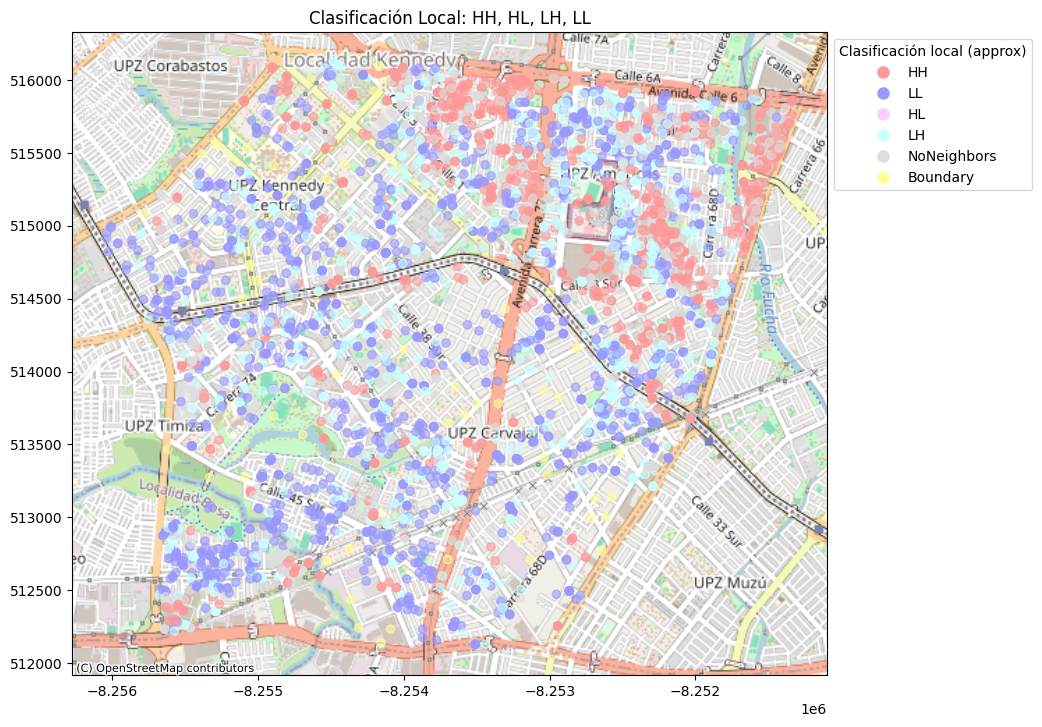

In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.lines import Line2D
import contextily as ctx

# Definimos un mapeo de colores claros
color_dict = {
    "HH": "#FF9999",  # Rojo claro
    "LL": "#9999FF",  # Azul claro
    "HL": "#FFCCFF",  # Rosa pastel
    "LH": "#CCFFFF",  # Azul celeste
    "NoNeighbors": "#DDDDDD",  # Gris claro
    "Boundary": "#FFFF99"  # Amarillo pastel
}

# Lista de categorías principales
categories = ["HH", "LL", "HL", "LH", "NoNeighbors", "Boundary"]

# Creamos un ListedColormap con colores claros
cmap = clr.ListedColormap([color_dict[c] for c in categories])

# Convertimos la columna 'cluster' a valores numéricos 0..(n-1)
cat_to_num = {cat: i for i, cat in enumerate(categories)}
bogota_epsg3116["cluster_code"] = bogota_epsg3116["cluster"].map(cat_to_num)

# Reproyectar a EPSG:3857 para que coincida con el mapa base
bogota_epsg3116 = bogota_epsg3116.to_crs(epsg=3857)

# Hacemos el plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
bogota_epsg3116.plot(
    column="cluster_code",
    categorical=True,
    cmap=cmap,
    legend=False,
    alpha=0.6,  # Ajusta la transparencia para mostrar el mapa base
    ax=ax
)

# Agregar un fondo de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=bogota_epsg3116.crs)

# Crear leyenda manual con colores claros
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cat, 
           markerfacecolor=color_dict[cat], markersize=10)
    for cat in categories
]
ax.legend(
    handles=legend_elements,
    loc='upper left',  # Posición relativa
    bbox_to_anchor=(1, 1),  # Mueve la leyenda a la derecha del gráfico
    title="Clasificación local (approx)"
)
ax.set_title("Clasificación Local: HH, HL, LH, LL")
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
# output_path = "C:/Users/Wilson/Documents/Prueba_Habi/imagenes/imagen_moran_c.jpg"
output_path ="C:/Users/lucas/OneDrive/Documentos/Prueba_habi/imagenes/imagen_moran_c.jpg"
plt.savefig(output_path, format='jpg', dpi=300)
plt.show()

* Dado los resultados para la UPL18 vemos el valor observado del indice de moran indica una autocorrelacion espacial dabil, lo que significa que no hay una fuerte tendencia a que valores similares(altos o bajos) esten agrupados espacial,emte, adicionalmente, el p value  indica significancia estadistica  del indice de moran, en otras palabras indica que hay evidencia para sugerir que existe algun tipo de patron espacial en los datos

## Fin Indice de moran data completa.

#### Asi se crea el indice de Morar y Lisa, si hay compatibilidad con las librerias.

In [88]:
# # Calcular la matriz de contiguidad espacial usando un criterio de "Queen" (vecinos compartiendo un borde o vértice)
# w = pysal.lib.weights.Queen.from_dataframe(bogota_epsg3116)

# # Calcular el índice de Moran
# y = bogota_epsg3116['mean_precios_m2'].values  # Suponiendo que 'mean_precios_m2' es la columna relevante
# moran = pysal.explore.esda.Moran(y, w)

# # Añadir el valor de Moran en el DataFrame
# bogota_epsg3116['moran_index'] = moran.I

# # Mostrar el índice de Moran
# print(f'Índice de Moran: {moran.I}')

# # Función para clasificar según el valor de Moran
# def clasificar_moran(i_value, media):
#     if i_value > media:
#         return 'HH'  # High-High
#     elif i_value < media:
#         return 'LL'  # Low-Low
#     else:
#         return 'HL'  # High-Low

# # Media de los valores de Moran
# media_moran = moran.I

# # Aplicar clasificación
# bogota_epsg3116['moran_class'] = bogota_epsg3116['moran_index'].apply(clasificar_moran, media=media_moran)

# # Graficar en un mapa con Geopandas
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # Colorear el mapa según las categorías del índice de Moran
# bogota_epsg3116.plot(column='moran_class', ax=ax, legend=True,
#                        legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'},
#                        cmap='coolwarm')

# # Títulos y etiquetas
# ax.set_title("Índice de Moran de Precios por Metro Cuadrado en Bogotá", fontsize=15)
# ax.set_axis_off()

# plt.show()

# **Punto 5**

Hacer el modelo de predicción de precios de su preferencia para valorar los inmuebles proporcionados y presentar el MAPE y RMSE del resultado.

##### Las predicciones y modelos de precios para viviendas deben hacersen por cuidad, esto dado que de una cuidad a otra los pueblos varian demasiado.

### Visualizacion y limpieza y selecion de datos antes de iniciar el modelo

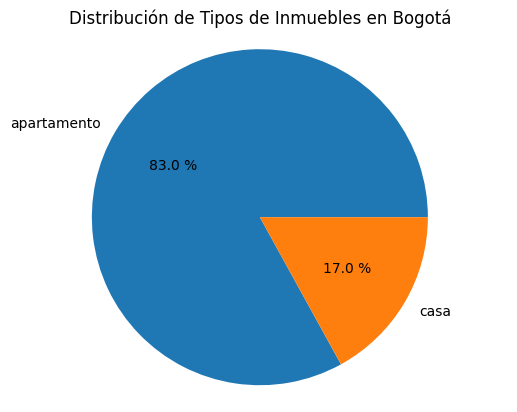

In [89]:
def pieChart(col, title):
    A = col.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%")
    plt.axis("equal")
    plt.title(title)
    plt.show()

pieChart(bogota['tipo_inmueble'], "Distribución de Tipos de Inmuebles en Bogotá")

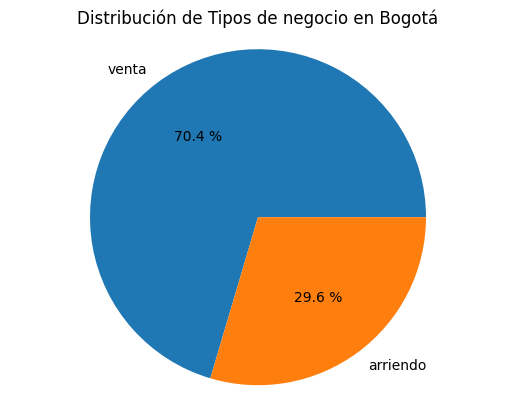

In [90]:
pieChart(bogota['tiponegocio'], "Distribución de Tipos de negocio en Bogotá")

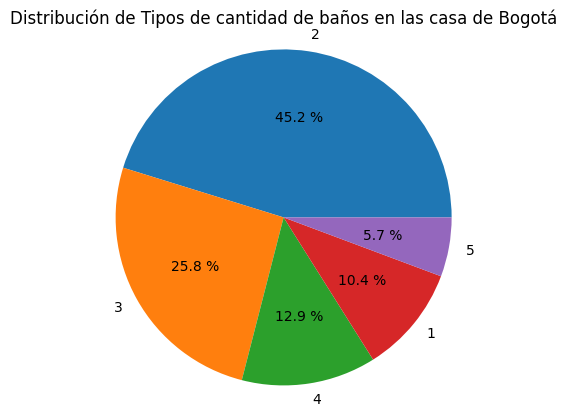

In [91]:
pieChart(bogota['banos'], "Distribución de Tipos de cantidad de baños en las casa de Bogotá")

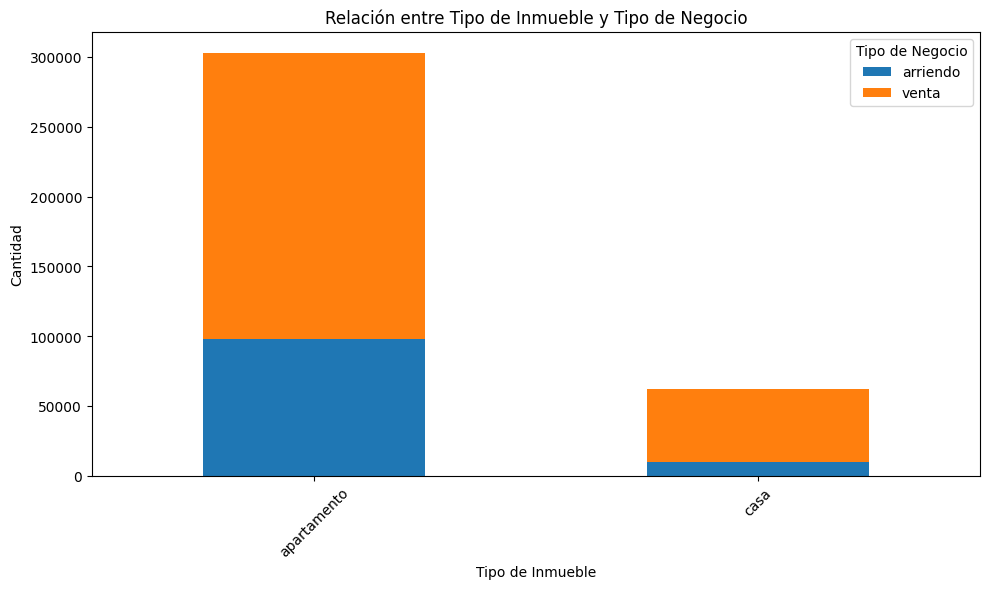

In [92]:
# Crear una tabla cruzada para contar las frecuencias entre las categorías
tabla_frecuencia = pd.crosstab(bogota['tipo_inmueble'], bogota['tiponegocio'])

# Graficar un gráfico de barras apilado
tabla_frecuencia.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalización de la gráfica
plt.title('Relación entre Tipo de Inmueble y Tipo de Negocio')
plt.xlabel('Tipo de Inmueble')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Negocio')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

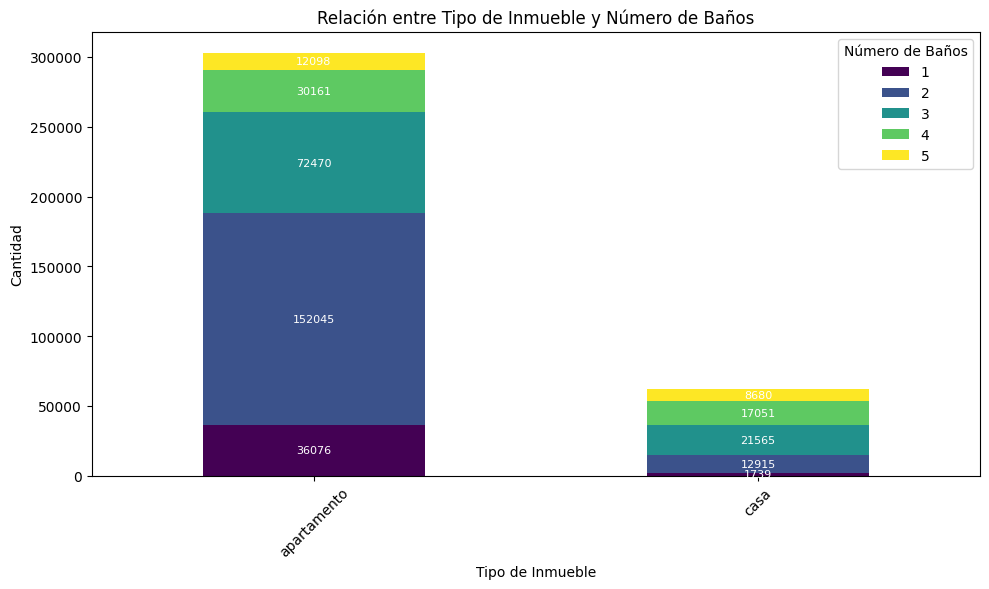

In [93]:
tabla_frecuencia = pd.crosstab(bogota['tipo_inmueble'], bogota['banos'])

# Graficar un gráfico de barras apilado
ax = tabla_frecuencia.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

# Agregar etiquetas con las cantidades de baños en cada barra
for i, bars in enumerate(ax.containers):
    # Agregar texto en cada barra
    for bar in bars:
        if bar.get_height() > 0:  # Mostrar solo si hay valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición horizontal
                bar.get_y() + bar.get_height() / 2,  # Posición vertical
                f'{int(bar.get_height())}',  # Texto
                ha='center', va='center', fontsize=8, color='white'
            )

# Personalización de la gráfica
plt.title('Relación entre Tipo de Inmueble y Número de Baños')
plt.xlabel('Tipo de Inmueble')
plt.ylabel('Cantidad')
plt.legend(title='Número de Baños')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [94]:
bogota['fecha_creacion'] = pd.to_datetime(bogota['fecha_creacion'], format='%Y-%m-%d')
# Crear la nueva columna con el formato 'año-mes'
bogota['fecha_mes'] = bogota['fecha_creacion'].dt.strftime('%Y-%m')
bogota = bogota.sort_values(by='fecha_creacion', ascending=True)

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [95]:
# Convertir 'fecha_mes' a tipo datetime para manipulación numérica
bogota['fecha_mes'] = pd.to_datetime(bogota['fecha_mes'], format='%Y-%m')
#  Encontrar el mes mínimo (punto de referencia)
min_fecha_mes = bogota['fecha_mes'].min()
# Calcular la diferencia en meses desde el mes mínimo
bogota['mesAnt'] = (bogota['fecha_mes'].dt.year - min_fecha_mes.year) * 12 + (bogota['fecha_mes'].dt.month - min_fecha_mes.month)

In [96]:
# Mostrar valores únicos de 'fecha_mes' con sus respectivos 'mesAnt'
for fecha, mes in bogota[['fecha_mes', 'mesAnt']].drop_duplicates().values:
    print(f"{fecha} {mes}")

2020-04-01 00:00:00 0
2020-05-01 00:00:00 1
2020-06-01 00:00:00 2
2020-07-01 00:00:00 3
2020-08-01 00:00:00 4
2020-09-01 00:00:00 5
2020-10-01 00:00:00 6
2020-11-01 00:00:00 7
2020-12-01 00:00:00 8
2021-01-01 00:00:00 9
2021-04-01 00:00:00 12
2021-05-01 00:00:00 13
2021-06-01 00:00:00 14
2021-07-01 00:00:00 15
2021-08-01 00:00:00 16
2021-09-01 00:00:00 17
2021-10-01 00:00:00 18
2021-11-01 00:00:00 19
2021-12-01 00:00:00 20
2022-01-01 00:00:00 21
2022-03-01 00:00:00 23
2022-05-01 00:00:00 25
2022-06-01 00:00:00 26
2022-07-01 00:00:00 27


In [97]:
fecha_minima = bogota['fecha_creacion'].min()
fecha_maxima = bogota['fecha_creacion'].max()

print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")

Fecha mínima: 2020-04-14 00:00:00
Fecha máxima: 2022-07-16 00:00:00


In [98]:
fecha_minima = bogota['fecha_mes'].min()
fecha_maxima = bogota['fecha_mes'].max()

print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")

Fecha mínima: 2020-04-01 00:00:00
Fecha máxima: 2022-07-01 00:00:00


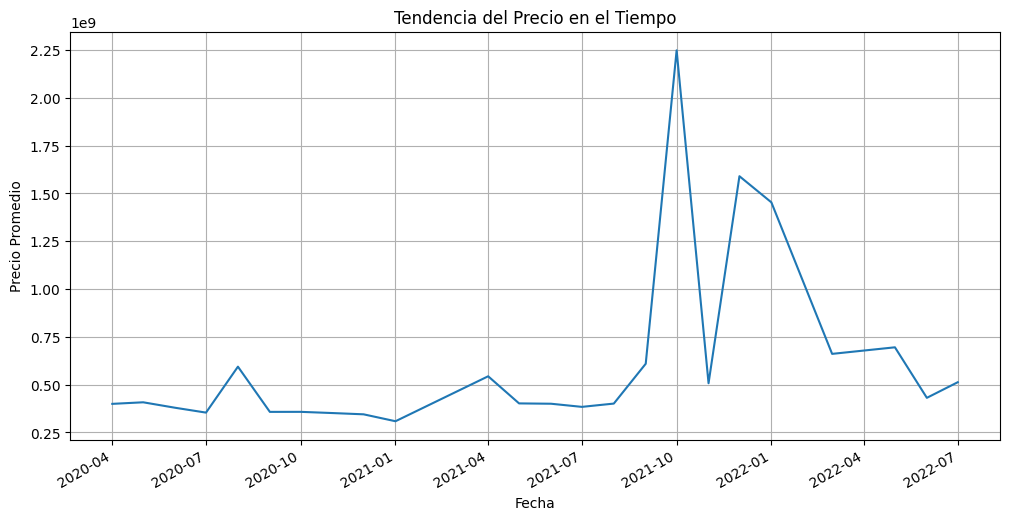

In [99]:
# Agrupar el precio promedio por fecha
bogota.groupby('fecha_mes')['precio'].mean().plot(figsize=(12, 6), title="Tendencia del Precio en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio")
plt.grid()
plt.show()

In [100]:
# Crear nuevas características a partir de la fecha
bogota['anio'] = bogota['fecha_mes'].dt.year
bogota['mes'] = bogota['fecha_mes'].dt.month
bogota['trimestre'] = bogota['fecha_mes'].dt.quarter

In [101]:
bogota.isnull().sum().sort_values(ascending=False)

precio             9856
precio_m2          9856
habitaciones        319
direccion            38
index_right          33
CODIGO_UPL           33
NOMBRE               33
fecha_creacion        0
latitud               0
id                    0
area                  0
banos                 0
departamento          0
municipio             0
longitud              0
anos_antiguedad       0
garajes               0
num_ascensores        0
geometry              0
tiponegocio           0
tipo_inmueble         0
fecha_mes             0
mesAnt                0
anio                  0
mes                   0
trimestre             0
dtype: int64

In [102]:
# Ordenar los resultados en orden descendente
null_percentage_sorted = (bogota.isnull().sum() / len(bogota) * 100).sort_values(ascending=False)
# Mostrar los resultados
print(null_percentage_sorted)

precio             2.701754
precio_m2          2.701754
habitaciones       0.087445
direccion          0.010417
index_right        0.009046
CODIGO_UPL         0.009046
NOMBRE             0.009046
fecha_creacion     0.000000
latitud            0.000000
id                 0.000000
area               0.000000
banos              0.000000
departamento       0.000000
municipio          0.000000
longitud           0.000000
anos_antiguedad    0.000000
garajes            0.000000
num_ascensores     0.000000
geometry           0.000000
tiponegocio        0.000000
tipo_inmueble      0.000000
fecha_mes          0.000000
mesAnt             0.000000
anio               0.000000
mes                0.000000
trimestre          0.000000
dtype: float64


In [103]:
encontrar_precios=bogota[bogota['precio'].isnull()]
# Calculate the mean of the 'habitaciones' column, ignoring NaN values
mean_habitaciones1 = encontrar_precios['habitaciones'].mean()
# Fill the NaN values with the mean and round to the nearest integer
encontrar_precios['habitaciones'] = encontrar_precios['habitaciones'].fillna(mean_habitaciones1).round().astype(int)

bogota=bogota[bogota['precio'].notnull()]
# Calculate the mean of the 'habitaciones' column, ignoring NaN values
mean_habitaciones = bogota['habitaciones'].mean()
# Fill the NaN values with the mean and round to the nearest integer
bogota['habitaciones'] = bogota['habitaciones'].fillna(mean_habitaciones).round().astype(int)

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [104]:
bogota.isnull().sum().sort_values(ascending=False)

direccion          35
NOMBRE             33
index_right        33
CODIGO_UPL         33
departamento        0
municipio           0
latitud             0
longitud            0
id                  0
fecha_creacion      0
precio              0
area                0
banos               0
habitaciones        0
tipo_inmueble       0
num_ascensores      0
garajes             0
anos_antiguedad     0
precio_m2           0
geometry            0
tiponegocio         0
fecha_mes           0
mesAnt              0
anio                0
mes                 0
trimestre           0
dtype: int64

In [105]:
# Crear variables dummy para 'tiponegocio' y 'tipo_inmueble'
bogota = pd.get_dummies(bogota, columns=['tiponegocio', 'tipo_inmueble'], dtype=int)
bogota = bogota.drop(columns=['tiponegocio_arriendo','tipo_inmueble_casa']) # tiponegocio_venta 1 , arriendo 0. tipo_inmueble_apartamento 1 apartamento , 0 casa
# Mostrar las primeras filas para verificar
bogota.head()

,id,fecha_creacion,latitud,longitud,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,direccion,anos_antiguedad,geometry,precio_m2,index_right,CODIGO_UPL,NOMBRE,fecha_mes,mesAnt,anio,mes,trimestre,tiponegocio_venta,tipo_inmueble_apartamento
437250,117912,2020-04-14,4.613338,-74.068993,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",5,3,260.0,580000000.0,0,2,Calle 171 # 49 A 26,30,POINT (-74.06899 4.61334),2230769.23,29.0,UPL23,Centro Histórico,2020-04-01,0,2020,4,2,1,0
24932,115339,2020-04-14,4.671909,-74.057602,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,2,91.0,600000000.0,1,1,Cra 19a #85-48,12,POINT (-74.0576 4.67191),6593406.59,28.0,UPL24,Chapinero,2020-04-01,0,2020,4,2,1,1
497143,80484,2020-04-14,4.725000,-74.037003,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,2,97.0,495000000.0,1,2,Calle 145A # 12A - 30,4,POINT (-74.037 4.725),5103092.78,5.0,UPL25,Usaquén,2020-04-01,0,2020,4,2,1,1
758501,162686,2020-04-14,4.735000,-74.036003,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,2,68.0,1300000.0,0,2,Carrera 14 # 156 - 07,12,POINT (-74.036 4.735),19117.65,13.0,UPL26,Toberín,2020-04-01,0,2020,4,2,0,1
497170,110689,2020-04-14,4.725000,-74.040001,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,2,129.0,480000000.0,0,2,-,1,POINT (-74.04 4.725),3720930.23,5.0,UPL25,Usaquén,2020-04-01,0,2020,4,2,1,0


In [106]:
bogota.isnull().sum().sort_values(ascending=False)

direccion                    35
CODIGO_UPL                   33
NOMBRE                       33
index_right                  33
departamento                  0
municipio                     0
latitud                       0
longitud                      0
id                            0
fecha_creacion                0
precio                        0
area                          0
banos                         0
habitaciones                  0
anos_antiguedad               0
garajes                       0
precio_m2                     0
num_ascensores                0
geometry                      0
fecha_mes                     0
mesAnt                        0
anio                          0
mes                           0
trimestre                     0
tiponegocio_venta             0
tipo_inmueble_apartamento     0
dtype: int64

In [107]:
bogotam=bogota[['id','fecha_mes','mesAnt','habitaciones','banos','area','precio','num_ascensores','garajes','anos_antiguedad','tiponegocio_venta','tipo_inmueble_apartamento','anio', 'mes', 'trimestre']]
bogotam.set_index('id', inplace=True)
bogotam['precio'] = bogotam['precio'].astype(float)

C:\Users\lucas\AppData\Local\Temp\ipykernel_1172\2594115959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bogotam['precio'] = bogotam['precio'].astype(float)


In [108]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = bogotam.select_dtypes(include=['float64', 'int']).corr(method='spearman')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
155,mes,trimestre,0.969510,0.969510
167,trimestre,mes,0.969510,0.969510
10,mesAnt,anio,0.944021,0.944021
130,anio,mesAnt,0.944021,0.944021
41,area,banos,0.810323,0.810323
29,banos,area,0.810323,0.810323
60,precio,tiponegocio_venta,0.769977,0.769977
108,tiponegocio_venta,precio,0.769977,0.769977
81,garajes,area,0.673134,0.673134
45,area,garajes,0.673134,0.673134


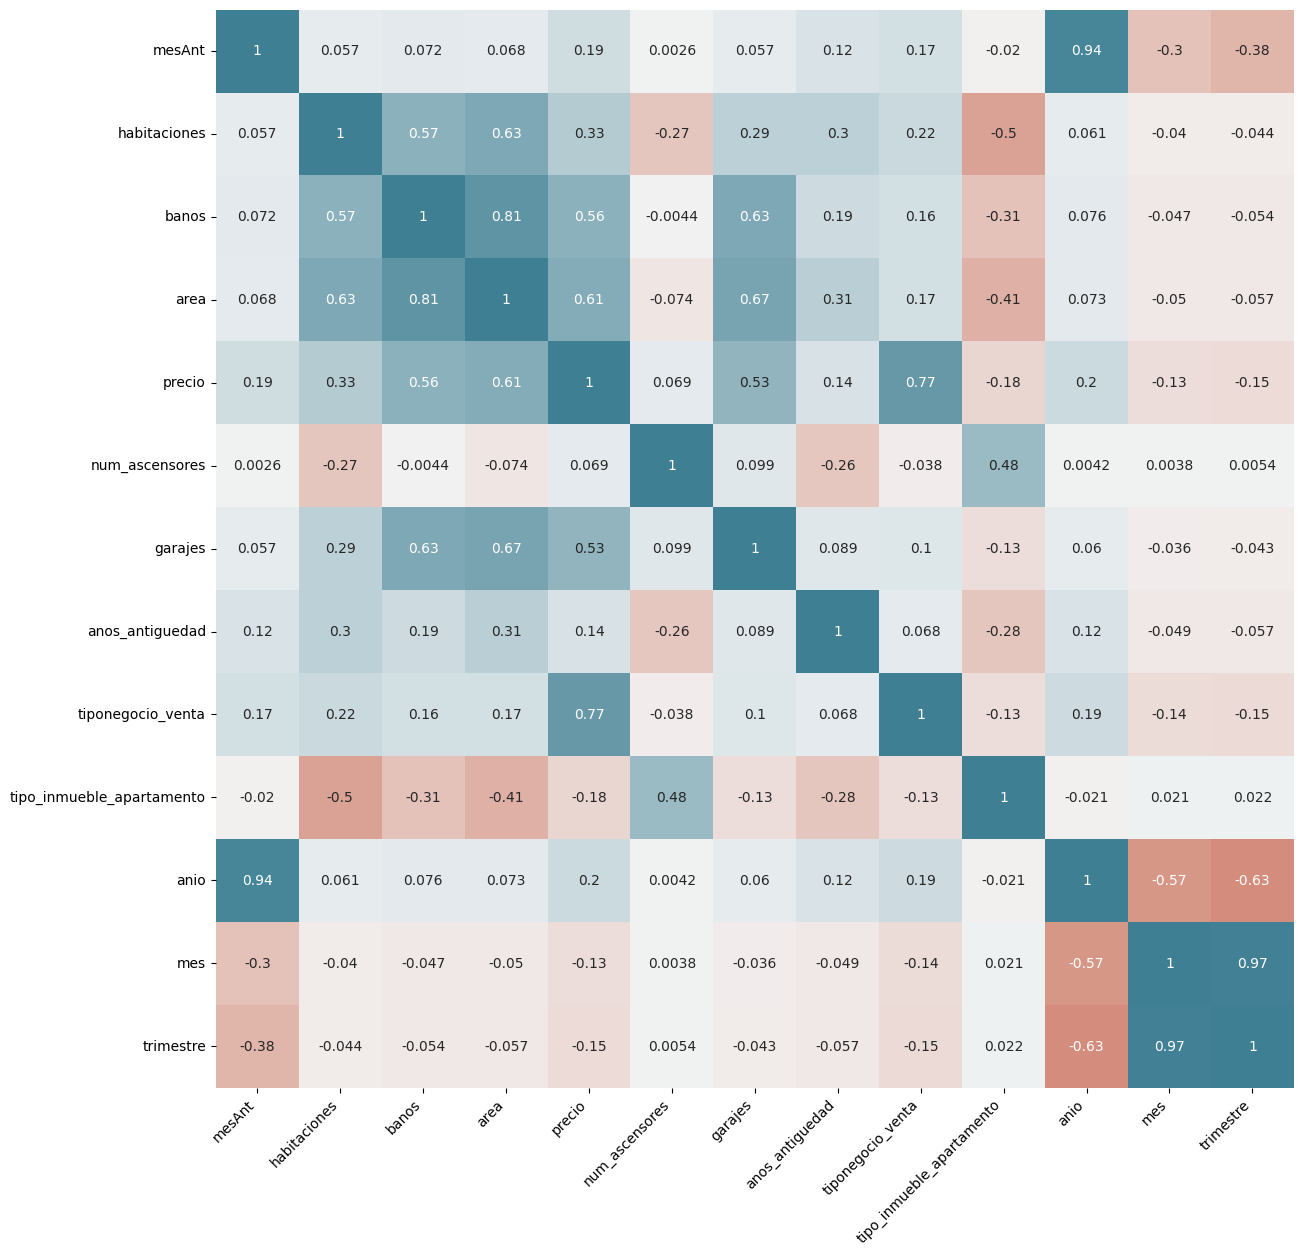

In [109]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 14))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

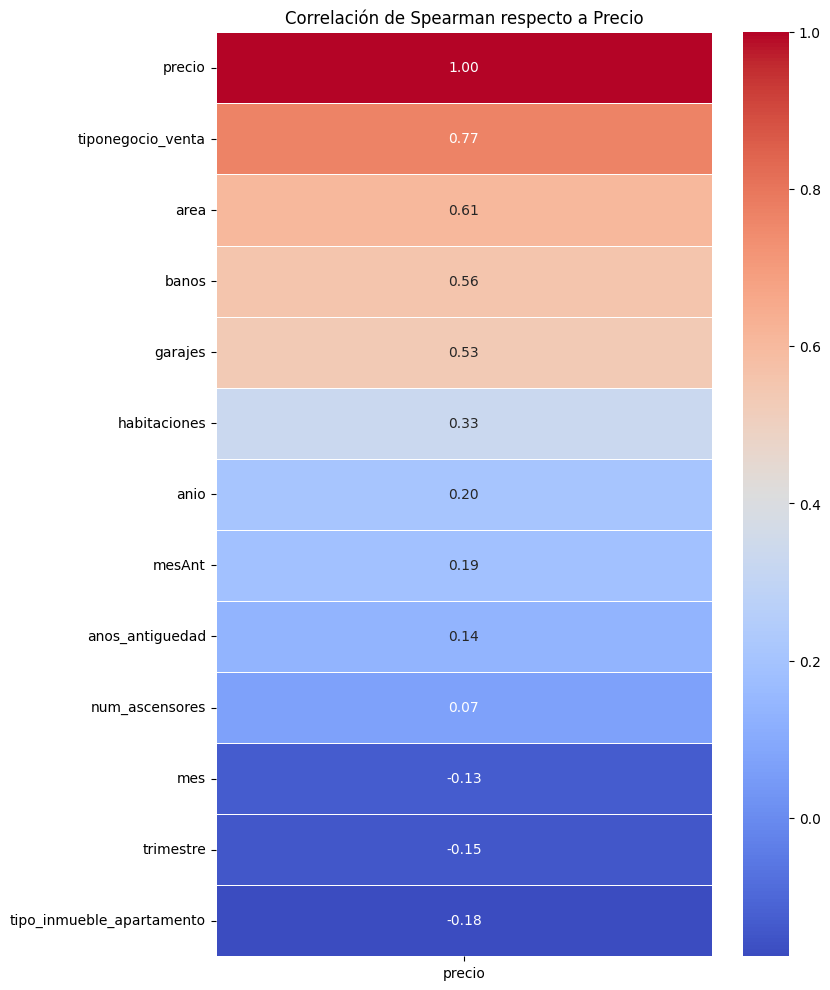

                             precio
precio                     1.000000
tiponegocio_venta          0.769977
area                       0.607941
banos                      0.557733
garajes                    0.532787
habitaciones               0.331570
anio                       0.204968
mesAnt                     0.187332
anos_antiguedad            0.135199
num_ascensores             0.068782
mes                       -0.132611
trimestre                 -0.146438
tipo_inmueble_apartamento -0.176589


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = bogotam.select_dtypes(include=['int', 'float64']).columns

# Definir las columnas que deseas excluir
exclude_features = ["fecha_mes","precio"]

# Filtrar las columnas a analizar excluyendo las no deseadas
numeric_cols_finish = [col for col in numeric_cols if col not in exclude_features]

# Incluir la variable objetivo 'precio'
final_columns_for_correlation = numeric_cols_finish + ['precio']

# Crear un subconjunto de datos con solo las columnas seleccionadas
df_correlation = bogotam[final_columns_for_correlation]

# Calcular la matriz de correlación de Spearman con respecto a 'precio'
correlation_matrix = df_correlation.corr(method='spearman')

# Extraer solo la correlación de las demás variables con respecto a 'precio'
correlation_target = correlation_matrix[['precio']].sort_values(by='precio', ascending=False)

# Visualización de la matriz de correlación con seaborn
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_target, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlación de Spearman respecto a Precio")
plt.show()

# Imprimir las correlaciones en orden descendente
print(correlation_target)


In [111]:
# elimina columnas bajo esta directris
filtered_columns = correlation_target[(correlation_target['precio'] >= 0.11) | (correlation_target['precio'] <= -0.11)].index.tolist()
# Crear un nuevo DataFrame solo con las columnas filtradas
filtered_df = bogotam[filtered_columns]

In [112]:
# filtered_df.reset_index(inplace=True)
# bogotam.reset_index(inplace=True)

In [113]:
# Unir ambos DataFrames por el índice
bogotam = filtered_df.join(bogotam[['fecha_mes',]], how='left')
bogotam['precio'] = bogotam['precio'].apply(lambda x: '{:.0f}'.format(x))
bogotam['precio'] = bogotam['precio'].round(2)
bogotam['precio'] = bogotam['precio'].astype(float)
bogotam

,precio,tiponegocio_venta,area,banos,garajes,habitaciones,anio,mesAnt,anos_antiguedad,mes,trimestre,tipo_inmueble_apartamento,fecha_mes
id,,,,,,,,,,,,,
117912,5.800000e+08,1,260.0,3,2,5,2020,0,30,4,2,0,2020-04-01
115339,6.000000e+08,1,91.0,2,1,2,2020,0,12,4,2,1,2020-04-01
80484,4.950000e+08,1,97.0,2,2,3,2020,0,4,4,2,1,2020-04-01
162686,1.300000e+06,0,68.0,2,2,3,2020,0,12,4,2,1,2020-04-01
110689,4.800000e+08,1,129.0,2,2,3,2020,0,1,4,2,0,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766278,3.850000e+08,1,60.0,3,1,2,2022,27,4,7,3,1,2022-07-01
4772356,1.860000e+09,1,360.0,4,3,4,2022,27,30,7,3,0,2022-07-01
4765742,2.200000e+09,1,268.0,4,2,3,2022,27,30,7,3,1,2022-07-01


In [114]:
bogotam.isnull().sum().sort_values(ascending=False)

precio                       0
tiponegocio_venta            0
area                         0
banos                        0
garajes                      0
habitaciones                 0
anio                         0
mesAnt                       0
anos_antiguedad              0
mes                          0
trimestre                    0
tipo_inmueble_apartamento    0
fecha_mes                    0
dtype: int64

##### Prueba de importancia de características (Feature Importance)

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Random Forest para evaluar la importancia de las características
# Convertir la fecha a una variable numérica (por ejemplo, número de meses desde el inicio)
bogotam['fecha_mes_numeric'] = (bogotam['fecha_mes'] - bogotam['fecha_mes'].min()).dt.days

# Preparar datos para el modelo
X = bogotam[['fecha_mes_numeric', 'tiponegocio_venta', 'area', 'banos', 'garajes', 'habitaciones', 'anos_antiguedad', 'tipo_inmueble_apartamento', 'mesAnt', 'anio', 'mes', 'trimestre']]
y = bogotam['precio']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Importancia de las características
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

anos_antiguedad              0.233046
banos                        0.190317
habitaciones                 0.165778
garajes                      0.117531
area                         0.066859
mesAnt                       0.051986
fecha_mes_numeric            0.049467
tiponegocio_venta            0.046797
anio                         0.041748
mes                          0.029170
tipo_inmueble_apartamento    0.005792
trimestre                    0.001509
dtype: float64


In [116]:
import statsmodels.api as sm

# Convertir fecha en numérico
bogotam['fecha_mes_numeric'] = bogotam['fecha_mes'].astype('int') // 10**9  # Convertir a timestamp

# Definir variables independientes y dependientes
X = sm.add_constant(bogotam[['mesAnt', 'habitaciones', 'banos', 'area', 'garajes', 'anos_antiguedad', 'tiponegocio_venta',
       'tipo_inmueble_apartamento', 'anio', 'mes', 'trimestre',
       'fecha_mes_numeric']])
y = bogotam['precio']

# Ajustar modelo de regresión
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.186
Date:                Fri, 24 Jan 2025   Prob (F-statistic):              0.290
Time:                        11:04:32   Log-Likelihood:            -9.3806e+06
No. Observations:              354944   AIC:                         1.876e+07
Df Residuals:                  354932   BIC:                         1.876e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.214e+05   7.45e+05     -1.102      0.270   -2.28e+06    6.39e+05
mesAnt                     -7.28e+09    6.7e+09     -1.086      0.277   -2.04e+10    5.85e+09
habitaciones               1.138e+08   1.21e+08      0.937      0.349   -1.24e+08    3.52e+08
banos                      5.886e+07   1.73e+08      0.341      0.733   -2.79e+08    3.97e+08
area                       1.459e+06    1.2e+06      1.212      0.226   -9.01e+05    3.82e+06
garajes                     8.87e+07   1.78e+08      0.498      0.618    -2.6e+08    4.38e+08
anos_antiguedad           -9.719e+06   1.34e+07     -0.727      0.467   -3.59e+07    1.65e+07
tiponegocio_venta         -1.821e+08   2.84e+08     -0.641      0.521   -7.39e+08    3.74e+08
tipo_inmueble_apartamento  3.972e+08   3.92e+08      1.013      0.311   -3.72e+08    1.17e+09
anio                       -2.24e+09   2.05e+09     -1.092      0.275   -6.26e+09    1.78e+09
mes                       -3.097e+08   2.06e+08     -1.504      0.133   -7.13e+08     9.4e+07
trimestre                  4.347e+08   5.08e+08      0.856      0.392    -5.6e+08    1.43e+09
fecha_mes_numeric          2853.9187   2614.912      1.091      0.275   -2271.232    7979.070
===============================================================================
Omnibus:                  2015976.176   Durbin-Watson:                    2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   206948224850118.156
Skew:                         343.922   Prob(JB):                          0.00
Kurtosis:                  118293.321   Cond. No.                      4.07e+24
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
bogotam.columns

Index(['precio', 'tiponegocio_venta', 'area', 'banos', 'garajes',
       'habitaciones', 'anio', 'mesAnt', 'anos_antiguedad', 'mes', 'trimestre',
       'tipo_inmueble_apartamento', 'fecha_mes', 'fecha_mes_numeric'],
      dtype='object')

### Mejor convinacion de variables de mayor importanca para predicciones

In [118]:
modelo=bogotam[['precio',
                #'tiponegocio_venta',
                'tipo_inmueble_apartamento',
                'area',
                'banos',
                #'garajes',
                'anos_antiguedad',
                #'anio',
                #'mesAnt',
                'mes',
                #'trimestre' 
                ]]

In [119]:
# para normalizar en caso de ser necesario
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=modelo.columns
# # columnas a normalizar
# feature_cols = ['tiponegocio_venta','tipo_inmueble_apartamento','area','banos','garajes','anos_antiguedad']
feature_cols=cols.drop(['precio'])

# modelo[feature_cols] = modelo[feature_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

modelo[feature_cols]=ss.fit_transform(modelo[feature_cols])

C:\Users\lucas\AppData\Local\Temp\ipykernel_1172\1539457399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo[feature_cols]=ss.fit_transform(modelo[feature_cols])


In [120]:
modelo.head()

,precio,tipo_inmueble_apartamento,area,banos,anos_antiguedad,mes
id,,,,,,
117912,580000000.0,-2.189231,1.022499,0.394833,1.483029,-0.70174
115339,600000000.0,0.456781,-0.280335,-0.580452,-0.370861,-0.70174
80484,495000000.0,0.456781,-0.234081,-0.580452,-1.194812,-0.70174
162686,1300000.0,0.456781,-0.457644,-0.580452,-0.370861,-0.70174
110689,480000000.0,-2.189231,0.012610,-0.580452,-1.503794,-0.70174


In [121]:
# Variables predictoras (features)
X = modelo[modelo.columns.drop(['precio'])]
# Variable objetivo (precio)
y = modelo[['precio']]

In [122]:
y

,precio
id,
117912,5.800000e+08
115339,6.000000e+08
80484,4.950000e+08
162686,1.300000e+06
110689,4.800000e+08
...,...
4766278,3.850000e+08
4772356,1.860000e+09
4765742,2.200000e+09


In [123]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,  test_size=0.2,  random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,test_size=0.25,random_state=42)

In [124]:
print("Tamaño de train: ", X_train.shape)
print("Tamaño de val:   ", X_val.shape)
print("Tamaño de test:  ", X_test.shape)

Tamaño de train:  (212966, 5)
Tamaño de val:    (70989, 5)
Tamaño de test:   (70989, 5)


In [125]:
import numpy as np
import sklearn
import lightgbm as lgb
print("numpy:", np.__version__)
print("sklearn:", sklearn.__version__)
print("lightgbm:", lgb.__version__)

numpy: 2.2.2
sklearn: 1.6.1
lightgbm: 4.5.0


In [126]:
# model = lgb.LGBMRegressor()
# model.fit(X_train, y_train)
# # predictions = model.predict(X_test)
# # 2. Predicciones en validación y prueba
# pred_val = model.predict(X_val)
# pred_test = model.predict(X_test)

# # 3. Calcular RMSE, R2 y MAPE en validación
# rmse_val  = np.sqrt(mean_squared_error(y_val, pred_val))
# r2_val    = r2_score(y_val, pred_val)
# mape_val  = mean_absolute_percentage_error(y_val, pred_val)

# # 4. Calcular RMSE, R2 y MAPE en prueba
# rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
# r2_test   = r2_score(y_test, pred_test)
# mape_test = mean_absolute_percentage_error(y_test, pred_test)


# print("\nMETRICAS EN PRUEBA:")
# print(f"  RMSE: {rmse_test:.4f}")
# print(f"  R²:   {r2_test:.4f}")
# print(f"  MAPE: {mape_test:.4f}")

# # 5. Imprimir resultados
# print("METRICAS EN VALIDACIÓN:")
# print(f"  RMSE: {rmse_val:.4f}")
# print(f"  R²:   {r2_val:.4f}")
# print(f"  MAPE: {mape_val:.4f}")

In [127]:
# # 1. Definir y entrenar el modelo
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 2. Predicciones en validación y prueba
# pred_val = model.predict(X_val)
# pred_test = model.predict(X_test)

# # 3. Calcular RMSE, R2 y MAPE en validación
# rmse_val  = np.sqrt(mean_squared_error(y_val, pred_val))
# r2_val    = r2_score(y_val, pred_val)
# mape_val  = mean_absolute_percentage_error(y_val, pred_val)

# # 4. Calcular RMSE, R2 y MAPE en prueba
# rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
# r2_test   = r2_score(y_test, pred_test)
# mape_test = mean_absolute_percentage_error(y_test, pred_test)


# print("\nMETRICAS EN PRUEBA:")
# print(f"  RMSE: {rmse_test:.4f}")
# print(f"  R²:   {r2_test:.4f}")
# print(f"  MAPE: {mape_test:.4f}")

# # 5. Imprimir resultados
# print("METRICAS EN VALIDACIÓN:")
# print(f"  RMSE: {rmse_val:.4f}")
# print(f"  R²:   {r2_val:.4f}")
# print(f"  MAPE: {mape_val:.4f}")

MODELO

In [128]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RandomizedSearchCV
import numpy as np

# Parche: evita usar StratifiedKFold si es un problema de regresión
cv = KFold(n_splits=5, shuffle=True, random_state=1986)

param_random_lgb = {
    'max_depth': [3, 5, 7, 10, 20],
    'learning_rate': [0.001, 0.01, 0.1],
    'num_leaves': [8, 16, 32, 64],
    'bagging_fraction': [0.5, 0.7, 1.0],  # equivale a "subsample" en XGBoost
    'feature_fraction': [0.5, 0.7, 1.0], # equivale a "colsample_bytree" en XGBoost
    'boosting_type': ['gbdt']
}

random_lgb = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(
        n_estimators=100,
        random_state=123,
        early_stopping_rounds=5
    ),
    param_distributions=param_random_lgb,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,     # si tienes conflictos, cámbialo a 1
    n_iter=10,     # sube para más búsqueda
    cv=cv,
    refit=True,
    verbose=1,
    return_train_score=True
)

random_lgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    #early_stopping_rounds=5
)

print("Mejores parámetros:", random_lgb.best_params_)
print("Mejor score (neg RMSE):", random_lgb.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 212966, n

In [129]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(random_lgb.best_params_, ":", random_lgb.best_score_, random_lgb.scoring)
# ==============================================================================
print("----------------------------------------")
print("Mejores parámetros:", random_lgb.best_params_)
print("Mejor score (neg RMSE):", random_lgb.best_score_)
print("Scoring usado:", random_lgb.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.01, 'feature_fraction': 0.5, 'boosting_type': 'gbdt', 'bagging_fraction': 0.5} : -72993527825.4314 neg_root_mean_squared_error
----------------------------------------
Mejores parámetros: {'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.01, 'feature_fraction': 0.5, 'boosting_type': 'gbdt', 'bagging_fraction': 0.5}
Mejor score (neg RMSE): -72993527825.4314
Scoring usado: neg_root_mean_squared_error


TEST

In [130]:
from sklearn.metrics import r2_score
modelo_final_lgb = random_lgb.best_estimator_
predicciones_test = modelo_final_lgb.predict(X_test)
r_squared = r2_score(y_test, predicciones_test)
print("R²:", r_squared)
# R²: -0.2952411336092444

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
R²: -0.2972898750516382


In [131]:
mse_test = mean_squared_error(y_test, predicciones_test)  # MSE por defecto
rmse_test = np.sqrt(mse_test)                             # se hace la raíz a mano

print(f"El error (rmse) del modelo LightGBM en test es: {rmse_test:.2f}")
# El error (rmse) del modelo LightGBM en test es: 736035140.39

El error (rmse) del modelo LightGBM en test es: 736617020.41


In [132]:
mape_test = mean_absolute_percentage_error(y_test, predicciones_test)
print(f"MAPE: {mape_test:.4f}")
# MAPE: 126.6948

MAPE: 127.0598


VALIDATION

In [133]:
# Calculo del R2 de validation
# ==============================================================================
from sklearn.metrics import r2_score
modelo_final_lgb = random_lgb.best_estimator_
predicciones_val = modelo_final_lgb.predict(X_val)
r_squared_validation = r2_score(y_val, predicciones_val)
print("R² validation:", r_squared_validation)
# R² validation: -0.2874464446171112

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
R² validation: -0.2887081875311306


In [134]:
mse_test = mean_squared_error(y_val, predicciones_val)  # MSE por defecto
rmse_test = np.sqrt(mse_test)                             # se hace la raíz a mano

print(f"El error (rmse) del modelo LightGBM en test es: {rmse_test:.2f}")
# El error (rmse) del modelo LightGBM en test es: 741001881.30

El error (rmse) del modelo LightGBM en test es: 741364896.37


In [135]:
mape_val = mean_absolute_percentage_error(y_val, predicciones_val)
print(f"  MAPE: {mape_val:.4f}")
# MAPE: 122.9594

  MAPE: 123.3148


In [136]:
# print("xgboost:", xgboost.__version__)
# print("sklearn:", sklearn.__version__)

In [137]:
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definimos la validación cruzada (KFold para regresión)
cv = KFold(n_splits=5, shuffle=True, random_state=1986)

# Diccionario de hiperparámetros para Random Forest
param_random_rf = {
    'n_estimators': [100, 200, 300, 500],   # cantidad de árboles
    'max_depth': [3, 5, 7, 10, 20, None],   # profundidad máxima o None (sin límite)
    'min_samples_split': [2, 5, 10],        # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4],          # mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None], # estrategia para seleccionar features
    'bootstrap': [True, False]             # usar o no muestreo con reemplazo
}

# Configuramos el RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=123),  # el modelo base
    param_distributions=param_random_rf,
    scoring='neg_root_mean_squared_error',  # métrica (neg-RMSE)
    n_jobs=-1,        # usar todos los núcleos
    n_iter=10,        # número de configuraciones aleatorias
    cv=cv,            # validación cruzada con KFold
    refit=True,       # entrenar un modelo final con los mejores parámetros
    verbose=1,
    return_train_score=True
)

# Entrenamos la búsqueda
random_rf.fit(X_train, y_train)

# Mejor configuración encontrada
print("Mejores parámetros:", random_rf.best_params_)
print("Mejor score (neg RMSE):", random_rf.best_score_)

# Modelo final entrenado con los mejores hiperparámetros
modelo_final_rf = random_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
Mejor score (neg RMSE): -73354020933.23894


In [138]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(random_rf.best_params_, ":", random_rf.best_score_, random_rf.scoring)
# ==============================================================================
print("----------------------------------------")
print("Mejores parámetros:", random_rf.best_params_)
print("Mejor score (neg RMSE):", random_rf.best_score_)
print("Scoring usado:", random_rf.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True} : -73354020933.23894 neg_root_mean_squared_error
----------------------------------------
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
Mejor score (neg RMSE): -73354020933.23894
Scoring usado: neg_root_mean_squared_error


TEST

In [139]:
from sklearn.metrics import r2_score
modelo_final_rf = random_rf.best_estimator_
predicciones_test = modelo_final_rf.predict(X_test)
r_squared = r2_score(y_test, predicciones_test)
print("R²:", r_squared)
# R²: -5.698138237251427

R²: -3.143159604234074


In [140]:
mse_test = mean_squared_error(y_test, predicciones_test)  # MSE por defecto
rmse_test = np.sqrt(mse_test)                             # se hace la raíz a mano

print(f"El error (rmse) del modelo LightGBM en test es: {rmse_test:.2f}")
# El error (rmse) del modelo LightGBM en test es: 1673787377.53

El error (rmse) del modelo LightGBM en test es: 1316403617.49


In [141]:
mape_test = mean_absolute_percentage_error(y_test, predicciones_test)
print(f"MAPE: {mape_test:.4f}")
# MAPE: 99.6805

MAPE: 102.6599


VALIDATION

In [142]:
from sklearn.metrics import r2_score
modelo_final_rf = random_rf.best_estimator_
predicciones_val = modelo_final_rf.predict(X_val)
r_squared = r2_score(y_val, predicciones_val)
print("R²:", r_squared)

R²: -3.245899803500887


In [143]:
mse_test = mean_squared_error(y_val, predicciones_val)  # MSE por defecto
rmse_test = np.sqrt(mse_test)                             # se hace la raíz a mano

print(f"El error (rmse) del modelo LightGBM en test es: {rmse_test:.2f}")

El error (rmse) del modelo LightGBM en test es: 1345673174.88


In [144]:
mape_test = mean_absolute_percentage_error(y_val, predicciones_val)
print(f"  MAPE: {mape_test:.4f}")

  MAPE: 100.5084


In [145]:
#Librería requerida
import pickle

#Guardado del modelo
filename = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Scrip/random_rf.pk"
with open(filename,'wb') as file:
#with open(ruta_archivo,'wb') as file:    
        pickle.dump(random_rf, file)

In [146]:
#Guardado del modelo
filename = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Scrip/random_lgb.pk"
with open(filename,'wb') as file:
#with open(ruta_archivo,'wb') as file:    
        pickle.dump(random_lgb, file)

In [ ]:
"""
Escriba aquí su código. De ser necesario, puede agregar más celdas.
"""

## **Punto 6**

Buscar y descargar base de datos de construcciones catastrales y base de datos de predios catastrales, todo con código. Es decir, utilizando las librerías necesarias para extraer datos desde internet sin necesidad de leerlos de manera local. Sugerimos la librería urllib. La información de estas fuentes la puede obtener de:

1. Construcciones catastrales: 'https://datosabiertos.bogota.gov.co/dataset/397ccbd8-e2c5-4700-b90e-b68d101ab0c5/resource/7e426e92-c168-4a99-ab67-25b16f070a68/download/dcons_geoson.zip'
2. Predios catastrales: 'https://datosabiertos.bogota.gov.co/dataset/e812efbe-acc3-4e70-9bfc-30fd2134afdd/resource/efb4e03d-173e-42b2-b35a-f10d6d610df2/download/predios_csv_1020.zip'

Datos abiertos bogota
3. https://datosabiertos.bogota.gov.co/dataset/5bbe2592-55e0-49e3-9a51-73c2bc042b67/resource/c51d6f6e-0302-415e-9a9c-79cc7105a986/download/gpkg_mr_v0924.zip

In [147]:
import os
import requests
import zipfile

## Pipeline1 de descarga, descompresion, eliminacion .zip, lectura.

In [ ]:
# URL del archivo ZIP (geodatos de Bogotá)
url = "https://datosabiertos.bogota.gov.co/dataset/397ccbd8-e2c5-4700-b90e-b68d101ab0c5/resource/7e426e92-c168-4a99-ab67-25b16f070a68/download/dcons_geoson.zip"

# Carpeta destino donde se guardará el archivo
dest_folder = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Data"
os.makedirs(dest_folder, exist_ok=True)  # Crea la carpeta si no existe

# Nombre del ZIP y ruta final
zip_path = os.path.join(dest_folder, "dcons_geoson.zip")

# 1. Descargar el archivo ZIP
print("Descargando archivo ZIP...")
response = requests.get(url, stream=True)
with open(zip_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)
print("Descarga completa.")

# 2. Descomprimir el archivo ZIP
print("Descomprimiendo archivo...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dest_folder)
print("Descompresión completa.")

# 3. Eliminar el archivo ZIP descargado
print("Eliminando ZIP...")
os.remove(zip_path)
print("Archivo ZIP eliminado.")

# 4. Leer el archivo descomprimido con GeoPandas
geojson_path = os.path.join(dest_folder, "CONST.geojson")

# Si el contenido fuese un Shapefile, usarías algo como:
# shapefile_path = os.path.join(dest_folder, "dcons_geoson.shp")

# Leer con GeoPandas (aquí asumimos formato GeoJSON)
gdf_c = gpd.read_file(geojson_path)
print("Lectura completa.")
print(gdf_c.shape)

Descargando archivo ZIP...


## Pipeline2 de descarga, descompresion, eliminacion .zip, lectura.

In [ ]:
# URL del archivo
url = "https://datosabiertos.bogota.gov.co/dataset/e812efbe-acc3-4e70-9bfc-30fd2134afdd/resource/efb4e03d-173e-42b2-b35a-f10d6d610df2/download/predios_csv_1020.zip"

# Carpeta destino donde se guardará el archivo
dest_folder = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Data"
os.makedirs(dest_folder, exist_ok=True)  # crea la carpeta si no existe

# Nombre del zip y ruta final
zip_path = os.path.join(dest_folder, "dcons_geoson2.zip")

# 1. Descargar el zip
print("Descargando archivo zip...")
response = requests.get(url, stream=True)
with open(zip_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)
print("Descarga completa.")

# 2. Descomprimir
print("Descomprimiendo archivo...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dest_folder)
print("Descompresión completa.")

# 3. Eliminar el archivo ZIP descargado
os.remove(zip_path)
print("Archivo ZIP eliminado.")

## Leyendo archivo que venia en el zip
csv_path = os.path.join(dest_folder, "predios_csv_1020.csv")
# Ahora lee el CSV con pandas y especifica sep y encoding si es necesario
predios = pd.read_csv(csv_path, sep=";", encoding="utf-8")
print("Lectura completa.")
print(predios.shape)

In [ ]:
# URL del archivo ZIP (geodatos de Bogotá)
url = "https://datosabiertos.bogota.gov.co/dataset/5bbe2592-55e0-49e3-9a51-73c2bc042b67/resource/c51d6f6e-0302-415e-9a9c-79cc7105a986/download/gpkg_mr_v0924.zip"

# Carpeta destino donde se guardará el archivo
dest_folder = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Data"
os.makedirs(dest_folder, exist_ok=True)  # Crea la carpeta si no existe

# Nombre del ZIP y ruta final
zip_path = os.path.join(dest_folder, "gpkg_mr_v0924.zip")

# 1. Descargar el archivo ZIP
print("Descargando archivo ZIP...")
response = requests.get(url, stream=True)
with open(zip_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)
print("Descarga completa.")

# 2. Descomprimir el archivo ZIP
print("Descomprimiendo archivo...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dest_folder)
print("Descompresión completa.")

# 3. Eliminar el archivo ZIP descargado
print("Eliminando ZIP...")
os.remove(zip_path)
print("Archivo ZIP eliminado.")

# 4. Leer el archivo descomprimido con GeoPandas
# Ruta del archivo GPKG
dest_folder = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/Data/GPKG_MR_V0924.gpkg"
# Cargar el archivo GPKG (capa por defecto)
gdf_bog = gpd.read_file(dest_folder)
print("Lectura completa. Algunas filas de ejemplo:")
print(gdf_bog.head())

In [ ]:
print(gdf_bog.crs)
gdf_bog.head(2)

In [ ]:
print(gdf_c.crs)
gdf_c.head(2)

In [ ]:
predios.head(2)

In [ ]:
duplicados = predios['OBJECTID'].value_counts()

# Filtrar valores que aparecen más de dos veces
duplicados_mas_de_dos = duplicados[duplicados > 2]

# Mostrar los valores duplicados más de dos veces
print(duplicados_mas_de_dos)

In [808]:
# Ruta donde se guardará el archivo
# ruta = r"C:/Users/lucas/OneDrive/Documentos/Prueba_habi/habi/predios.csv"
# # Guardar CSV sin índice
# predios[['OBJECTID','PreNBarrio','PreDirecc']].to_csv(ruta,sep=";", index=False, encoding='utf-8')

In [ ]:
## Se hace necesario convertir epsg=4686 a epsg=4326  cuando se trabaja condatos geoespaciales y se requiere estandarizar el sistema de cooredenadas
if gdf_c.crs is None or gdf_c.crs.to_epsg() != 4686:
    gdf_c.set_crs(epsg=4686, inplace=True)

# Convertir el CRS a EPSG:4326
gdf_c = gdf_c.to_crs(epsg=4326)
print(gdf_c.crs)

In [ ]:
# Verificar que las columnas 'latitud' y 'longitud' existen en el DataFrame
if 'latitud' in predios.columns and 'longitud' in predios.columns:
    # Crear una columna de geometría usando las coordenadas
    geometry = [Point(xy) for xy in zip(predios['longitud'], predios['latitud'])]
    
    # Convertir a GeoDataFrame
    gpredios = gpd.GeoDataFrame(predios, geometry=geometry)
    
    # Asignar el sistema de coordenadas EPSG:4326
    gpredios.set_crs(epsg=4326, inplace=True)
    
    # Mostrar las primeras filas del GeoDataFrame
    # print(gpredios.head())
else:
    print("El DataFrame no contiene las columnas 'latitud' y 'longitud'.")

In [ ]:
"""
Escriba aquí su código. De ser necesario, puede agregar más celdas.
"""

Hacer un join espacial entre la base de datos de predios y la de UPLs y calcular cuántos predios residenciales existen en Bogotá por UPL.

In [ ]:
"""
Escriba aquí su código. De ser necesario, puede agregar más celdas.
"""